<a href="https://colab.research.google.com/github/saudaminisahoo/HACKATHON_2025/blob/main/GSI_HACATHON_2025_model_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Here We apply Random Forest to predict Commodity from Lithology
* The Area is 50K degreesheet. It has data from Andrapradesh and Karnataka
* We have known commodity locations(we assign them with different numbers)
* For training purposes some of the commodities would be hidden from machine(but known to us).
* For Machine Learning to work it has to know what is a commodity as well as what is not a deposit


# 1. Data Import and Libraries

##1.1 Libraries and Data Access

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from geopandas import GeoDataFrame
from pyproj import Proj
from shapely.geometry import Point
from sklearn.neighbors import BallTree
myProj = Proj("+proj=utm +zone=43 +north +datum=WGS84 +units=m +no_defs")   # Define Projection to be UTM 44N.

##1.2 Checking and Plotting 25k Lithology Files

### Lithology

In [ ]:
# Replace 'path/to/your/file.shp' with the actual path to your shapefile in Google Drive.
#/content/drive/My Drive/data_2025_hackathon
# You might need to mount your Google Drive first:
# from google.colab import drive
# drive.mount('/content/drive')

file_path ='/content/drive/My Drive/HACATHON-2025_GSI/data_2025_hackathon/25K/lithology_25k_ngdr_20250224140917945/lithology_25k_ngdr.shp'


gdf = gpd.read_file(file_path)

  # Check the Coordinate Reference System (CRS)
print(gdf.crs)

gdf_mineral=gpd.read_file('/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/25K/mineralization_25k_ngdr_20250224141143411/mineralization_25k_ngdr_20250224141143411.shp')



EPSG:4326


In [ ]:
file_path="/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/clustered_data/clustered_data.shp"

In [ ]:
gdf_cluster = gpd.read_file(file_path)

  # Check the Coordinate Reference System (CRS)
print(gdf_cluster.crs)

EPSG:4326


In [ ]:
gdf_mineral.head(20)

gid input_cent  edition_no toposheet_ commodity descriptio accession_  \
0    77         SR           1      57B08    Copper       None       None   
1    80         SR           1      57E11   Diamond       None       None   
2    81         SR           1      57E11   Diamond       None       None   
3    82         SR           1      57E11   Diamond       None       None   
4    83         SR           1      57E11   Diamond       None       None   
5    84         SR           1      57E11   Diamond       None       None   
6    85         SR           1      57E11   Diamond       None       None   
7    86         SR           1      57E11   Diamond       None       None   
8    87         SR           1      57E11   Diamond       None       None   
9    88         SR           1      57E11   Diamond       None       None   
10  111         SR           1      57F11      Gold       None       None   
11  113         SR           1      57B08      Gold       None       None   
12  119         SR           1      57F11      Gold       None       None   
13  120         SR           1      57F11      Gold       None       None   
14  121         SR           1      57F11      Gold       None       None   
15  165         SR           1      57B08      Lead       None       None   
16  166         SR           1      57B08      Lead       None       None   

   remarks                   geometry  
0     None   POINT (76.4441 14.14972)  
1     None  POINT (77.58692 15.28887)  
2     None  POINT (77.59776 15.29494)  
3     None  POINT (77.59186 15.28002)  
4     None  POINT (77.59679 15.28057)  
5     None  POINT (77.60125 15.28027)  
6     None   POINT (77.6017 15.27563)  
7     None  POINT (77.60108 15.26996)  
8     None  POINT (77.60858 15.26231)  
9     None  POINT (77.60921 15.25727)  
10    None  POINT (77.52432 14.25855)  
11    None   POINT (76.4452 14.06625)  
12    None  POINT (77.50993 14.31012)  
13    None  POINT (77.50993 14.31012)  
14    None   POINT (77.52445 14.2612)  
15    None  POINT (76.43737 14.14178)  
16    None  POINT (76.43737 14.14178)

In [ ]:
gdf_cluster.head()

accessory_                         major_mine  \
0                           MICA                    QUARTZ,SERICITE   
1   Goethite, limonite and chert             Hematite and quartzite   
2              QUARTZ IN FRINGES      PLAGIOCLASE,CHLORITE,PYROXENE   
3         muscovite and fuchsite                             quartz   
4  opaques with minor amphiboles  chlorite, plagioclase, carbonates   

                     lithologic         texture  accessor_1  major_mi_1  \
0                   Meta gabbro       SCHISTOSE           2           2   
1  Banded ferruginous quartzite  Banded texture           7           8   
2                     Argillite    FINE GRAINED           3           1   
3                     Quartzite     xenoblastic           2           2   
4                   Meta basalt     porphyritic           1           6   

   litholog_1  texture_la  cluster  \
0           1           1        8   
1           3           1        2   
2           4           2        8   
3           3           3        8   
4           7           3        7   

                                            geometry  
0  POLYGON ((76.43579 14.05139, 76.43546 14.05139...  
1  POLYGON ((76.23655 14.1046, 76.23647 14.10459,...  
2  POLYGON ((76.44182 14.06624, 76.44177 14.06655...  
3  POLYGON ((76.14813 14.24309, 76.1481 14.24313,...  
4  POLYGON ((76.25018 14.64933, 76.25019 14.64731...

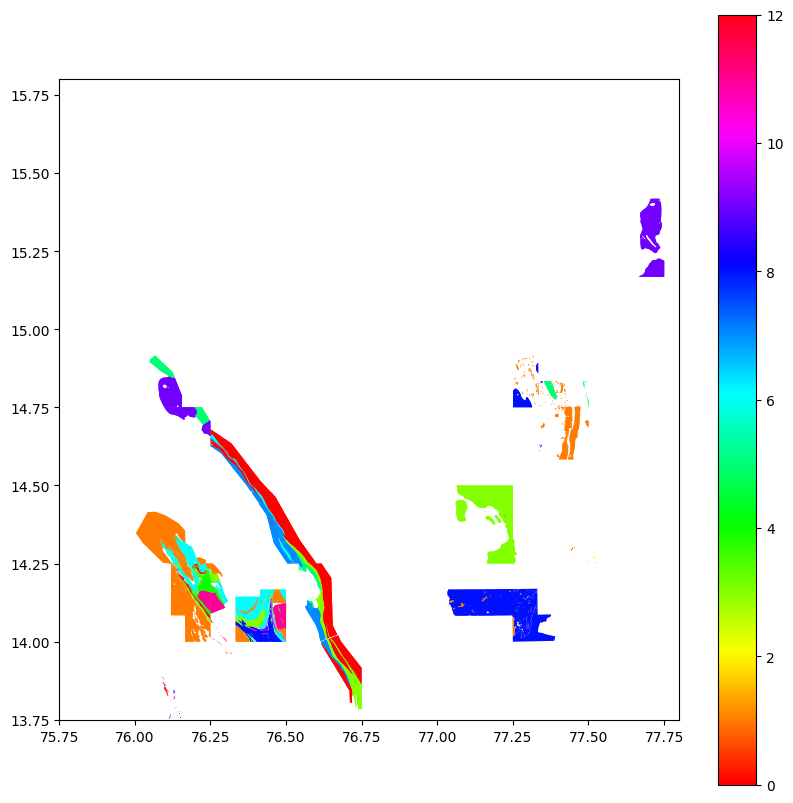

gid input_cent  edition_no toposheet_ geometry_i         stratigrap  \
0   4792         SR           1      57B04       None           Archaean   
1  11224         SR           1      57F04       None  Palaeoproterozoic   
2   8053         SR           1      57B08       None           Archaean   
3   6462         SR           1      57B08       None           Archaean   
4   4505         SR           1      57A13       None           Archaean   

  supergroup   group_name sub_group        formation  ... g_age_syst  \
0       None       Sargur      None  Ghattihosahalli  ...       None   
1       None         None      None  Acid intrusives  ...       None   
2    Dharwar  Chitradurga      None          Hiriyur  ...       None   
3    Dharwar  Chitradurga      None        Ingaldhal  ...       None   
4    Dharwar  Hutti-Muski      None           Buddni  ...       None   

  g_material texture                     major_mine  \
0       None    None     hornblende and plagioclase   
1       None    None                           None   
2       None    None                        CALCITE   
3       None    None  plagioclase, fibrous chlorite   
4       None    None                           None   

                   accessory_ accession_ remarks    shape_leng    shape_area  \
0  sphene, epidote and zircon       None    None  29947.381248  2.139712e+06   
1                        None       None    None    536.449944  1.561984e+04   
2                      PYRITE       None    None    446.293357  1.396032e+02   
3                      PYRITE       None    None    866.026953  1.542011e+04   
4                        None       None    None   2563.997302  7.698388e+01   

                                            geometry  
0  POLYGON ((76.19955 14.07173, 76.19952 14.07169...  
1  POLYGON ((77.12362 14.08862, 77.12293 14.08829...  
2  POLYGON ((76.40319 14.00003, 76.4032 14.00002,...  
3  POLYGON ((76.39095 14.09955, 76.39414 14.10087...  
4  MULTIPOLYGON (((76.83333 15.75, 76.83443 15.75...  

[5 rows x 25 columns]

In [ ]:
# Reproject if necessary (if the CRS is not already 44N UTM)
  #if gdf.crs != "EPSG:32644":
      #gdf = gdf.to_crs("EPSG:32644")
      #print("Shapefile reprojected to EPSG:32644")

  # Now you can analyze the GeoDataFrame 'gdf'
  # Example: Print the first 5 rows
#print(gdf.head())

  # Example: Plot the shapefile
#gdf.plot(column="commodity", cmap='hsv', figsize=(8,8))

fig, ax = plt.subplots(figsize=(10, 10))
gdf_cluster.plot(ax=ax, column="cluster", cmap='hsv', legend=True)
plt.xlim([75.75, 77.8])
plt.ylim(13.75, 15.8)
plt.show()
gdf.head()


### Checking Other Shape files

#### Mine Quarry

In [ ]:
# Replace 'path/to/your/file.shp' with the actual path to your shapefile in Google Drive.
# You might need to mount your Google Drive first:
# from google.colab import drive
# drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/8_Datasets/HACATHON-2025_GSI/data_2025_hackathon/25K/mine_quarry_25k_ngdr_20250224140917945/mine_quarry_25k_ngdr_20250224140917945.shp'

gdf = gpd.read_file(file_path)

  # Check the Coordinate Reference System (CRS)
print(gdf.crs)


EPSG:4326


In [ ]:
# Reproject if necessary (if the CRS is not already 44N UTM)
  #if gdf.crs != "EPSG:32644":
      #gdf = gdf.to_crs("EPSG:32644")
      #print("Shapefile reprojected to EPSG:32644")

  # Now you can analyze the GeoDataFrame 'gdf'
  # Example: Print the first 5 rows
print(gdf.head())


   gid input_cent  edition_no toposheet_                   commodity  status  \
0   77         SR           1      57B04  Banded magnetite quartzite  Quarry   
1   78         SR           1      57B04  Banded magnetite quartzite  Quarry   
2   79         SR           1      57B04  Banded magnetite quartzite  Quarry   
3   80         SR           1      57B04  Banded magnetite quartzite  Quarry   
4   81         SR           1      57B04  Banded magnetite quartzite  Quarry   

  accession_ remarks                   geometry  
0       None    None  POINT (76.23857 14.22074)  
1       None    None  POINT (76.20212 14.14398)  
2       None    None  POINT (76.20293 14.14545)  
3       None    None  POINT (76.22529 14.11641)  
4       None    None   POINT (76.23728 14.1005)  


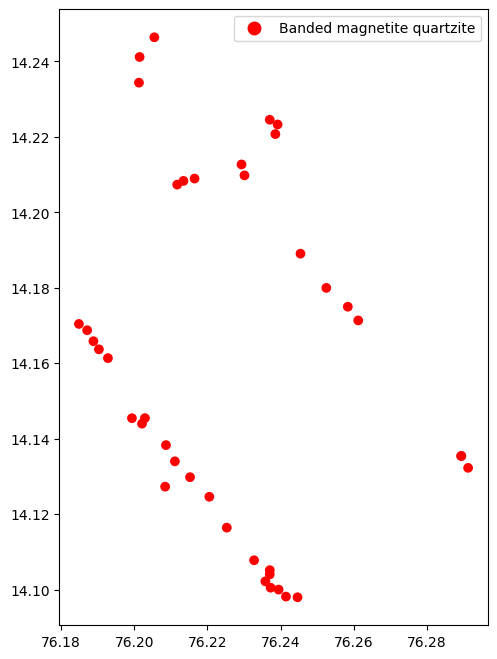

In [ ]:

  # Example: Plot the shapefile
gdf.plot(column="commodity", cmap='hsv', figsize=(8,8), legend=True)

plt.show()

) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()


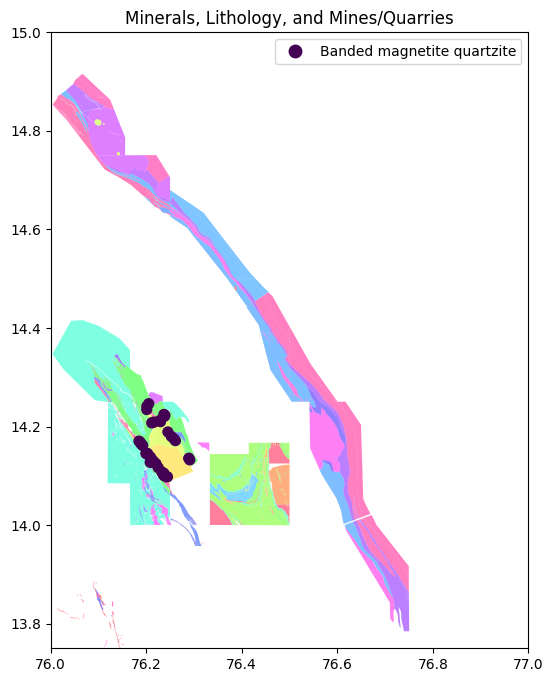

In [ ]:
# prompt: I want to plot Both The commodity and mine_quarry in a single plot

import matplotlib.pyplot as plt

# Assuming 'litho', 'df', and 'gdf' (from mine_quarry) are already defined as in your previous code.

f, ax = plt.subplots(figsize=(8, 8))

# Plot the lithology data
litho.to_crs(df.crs).plot(ax=ax, column="major_mine", cmap='hsv', legend=True, alpha=0.5)  # Reduced alpha for better visibility

# Plot the mine_quarry data
gdf.to_crs(df.crs).plot(ax=ax, column="commodity", cmap='viridis', legend=True, markersize=50) # Different colormap and markersize


plt.title('Minerals, Lithology, and Mines/Quarries')
plt.xlim([76, 77])
plt.ylim([13.75, 15])

# Save the figure (optional)
plt.savefig('combined_plot.tiff', format='tiff', dpi=300)

plt.show()


### Faults

In [ ]:
# Replace 'path/to/your/file.shp' with the actual path to your shapefile in Google Drive.
# You might need to mount your Google Drive first:
# from google.colab import drive
# drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/8_Datasets/HACATHON-2025_GSI/data_2025_hackathon/25K/fault_25k_ngdr_20250224140917945'

gdf_faults = gpd.read_file(file_path)

  # Check the Coordinate Reference System (CRS)
print(gdf_faults.crs)

EPSG:4326


   gid input_cent  edition_no toposheet_    fault_type fault_name kinematics  \
0  321         SR           1      57B07         Fault       None       None   
1  324         SR           1      57C09         Fault       None       None   
2  322         SR           1      57B08  Fault-Thrust       None       None   
3  414         SR           1      57E11         Fault       None       None   
4  415         SR           1      57E11         Fault       None       None   

  strike   dip displaceme downthrow_ neotech_ac age_activa accession_  \
0   None  None       None       None       None       None       None   
1   None  None       None       None       None       None       None   
2   None  None       None       None       None       None       None   
3   None  None       None       None       None       None       None   
4   None  None       None       None       None       None       None   

                  remarks   shape_leng  \
0                   Fault  1356.484344

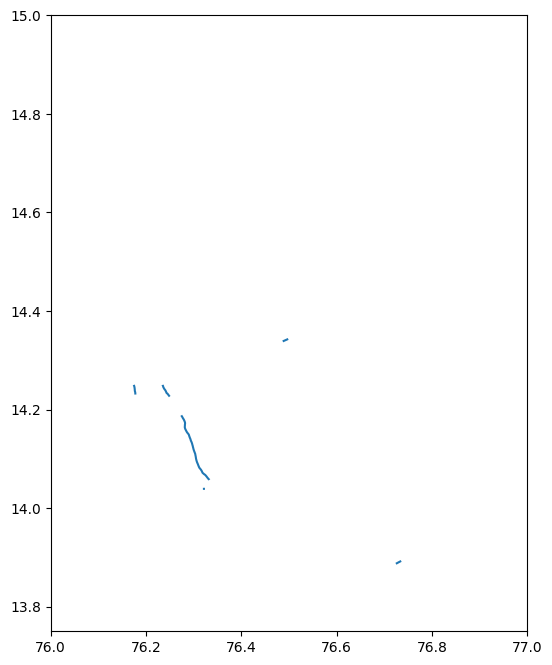

In [ ]:
# Reproject if necessary (if the CRS is not already 44N UTM)
  #if gdf.crs != "EPSG:32644":
      #gdf = gdf.to_crs("EPSG:32644")
      #print("Shapefile reprojected to EPSG:32644")

  # Now you can analyze the GeoDataFrame 'gdf'
  # Example: Print the first 5 rows
print(gdf_faults.head())

  # Example: Plot the shapefile
gdf_faults.plot(figsize=(8,8))
plt.xlim(76, 77)
plt.ylim(13.75, 15)
plt.savefig('Faults_25k.tiff', format='tiff', dpi=300)
plt.show()

) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()


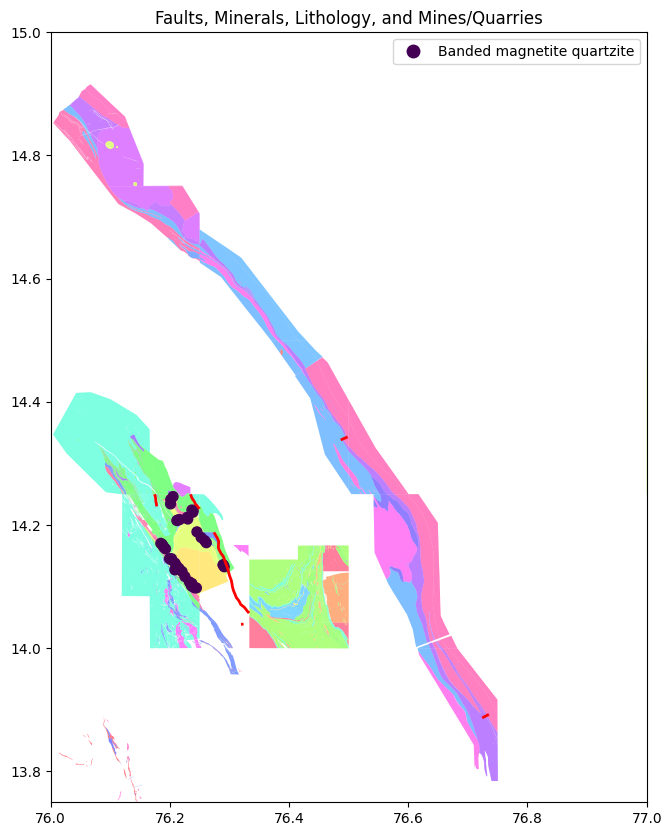

In [ ]:
# prompt: Plot the faults and commodity together

import matplotlib.pyplot as plt

# Assuming 'litho', 'df', 'gdf' (mine_quarry), and 'gdf_faults' are already defined and loaded as GeoDataFrames.
# Ensure all GeoDataFrames have the same CRS for plotting.

f, ax = plt.subplots(figsize=(10, 10))

# Plot lithology
litho.to_crs(df.crs).plot(ax=ax, column="major_mine", cmap='hsv', legend=True, alpha=0.5)

# Plot mine/quarry data
gdf.to_crs(df.crs).plot(ax=ax, column="commodity", cmap='viridis', legend=True, markersize=50)

# Plot faults
gdf_faults.to_crs(df.crs).plot(ax=ax, color='red', linewidth=2) # Plot faults in red


plt.title('Faults, Minerals, Lithology, and Mines/Quarries')
plt.xlim([76, 77])
plt.ylim([13.75, 15])

plt.savefig('combined_plot_with_faults.tiff', format='tiff', dpi=300)
plt.show()


In [ ]:
# prompt: Want to count the number of data points for commodity in mine_quarry

import pandas as pd
import geopandas as gpd

# Assuming 'gdf' is the GeoDataFrame loaded from the mine_quarry shapefile
file_path = '/content/drive/MyDrive/8_Datasets/HACATHON-2025_GSI/data_2025_hackathon/25K/mine_quarry_25k_ngdr_20250224140917945/mine_quarry_25k_ngdr_20250224140917945.shp'
gdf = gpd.read_file(file_path)

# Count the number of data points for each commodity
commodity_counts = gdf['commodity'].value_counts()

commodity_counts


commodity
Banded magnetite quartzite    40
Name: count, dtype: int64

##1.3 Data of 50K Geology

### Lithology

In [ ]:
# Replace 'path/to/your/file.shp' with the actual path to your shapefile in Google Drive.
#/content/drive/My Drive/data_2025_hackathon
# You might need to mount your Google Drive first:
# from google.colab import drive
# drive.mount('/content/drive')

file_path_50k_litho ='/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/50K/Geology map 50K/lithology_gcs_ngdr_20250224141337303/lithology_gcs_ngdr.shp'


gdf_50k_litho = gpd.read_file(file_path_50k_litho)


In [ ]:
gdf_50k_litho.head()

gid  objectid input_cent toposheet_  edition_nu  geometry_i       age  \
0  76867     76869        BAN      57C09           0         0.0  ARCHAEAN   
1  73196     73198        BAN      57B03           0         0.0  ARCHAEAN   
2  68446     68448        BAN      57B08           0         0.0  ARCHAEAN   
3  79548     79550        BAN      57B03           0         0.0  ARCHAEAN   
4  78054     78056        HYD      57E11           0         0.0  ARCHAEAN   

  supergroup   group_name     formation  ... area1 notation12     shape_leng  \
0    DHARWAR  CHITRADURGA       HIRIYUR  ...   0.0       None  567688.063970   
1    DHARWAR    BABABUDAN  KIBBANAHALLI  ...   0.0       None   47714.270378   
2    DHARWAR  CHITRADURGA     INGALDHAL  ...   0.0       None     443.267997   
3    DHARWAR  CHITRADURGA     VANIVILAS  ...   0.0       None     900.607911   
4    DHARWAR    JONNAGIRI          None  ...   0.0       None     390.928633   

     shape_area                         stratigr_1              sld_name  \
0  4.061052e+08                 ARCHAEAN-ARGILLITE   lithology_gcs_ngdr9   
1  7.794640e+06  ARCHAEAN-CHLORITE-SERICITE-SCHIST  lithology_gcs_ngdr10   
2  7.122255e+03            ARCHAEAN-FERRO-DOLOMITE  lithology_gcs_ngdr10   
3  2.554953e+04                 ARCHAEAN-LIMESTONE  lithology_gcs_ngdr10   
4  6.075624e+03           ARCHAEAN-CHLORITE-SCHIST  lithology_gcs_ngdr10   

  notation_l     Long      Lat  \
0      Adch6  76.6121  13.8730   
1     Adbkh4  76.1537  14.4189   
2      Adci1  76.4383  14.1248   
3      Adcv3  76.1380  14.4263   
4       Adj3  77.5662  15.2629   

                                            geometry  
0  POLYGON ((76.67449 13.92376, 76.67439 13.92375...  
1  POLYGON ((76.1497 14.43876, 76.14948 14.43907,...  
2  POLYGON ((76.43849 14.12406, 76.43842 14.12387...  
3  POLYGON ((76.13945 14.42482, 76.13893 14.42498...  
4  POLYGON ((77.56535 15.2625, 77.56614 15.26305,...  

[5 rows x 30 columns]

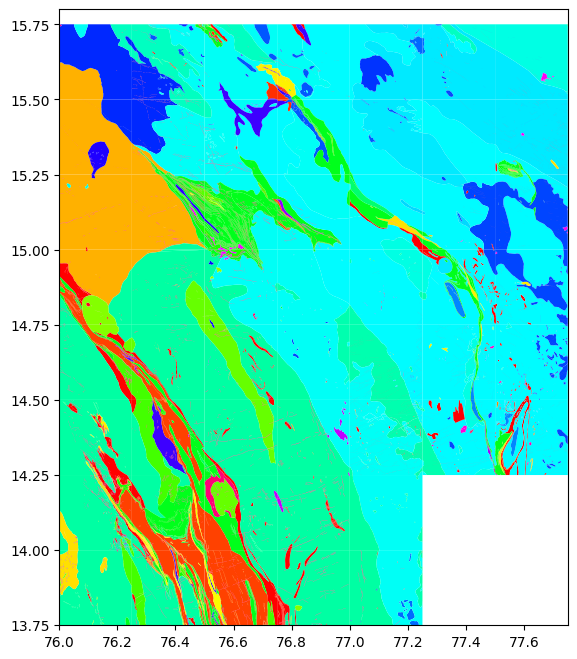

In [ ]:
gdf_50k_litho.plot(column="stratigr_1", cmap='hsv', figsize=(8,8))
plt.xlim([76, 77.75])
plt.ylim(13.75, 15.8)
plt.show()

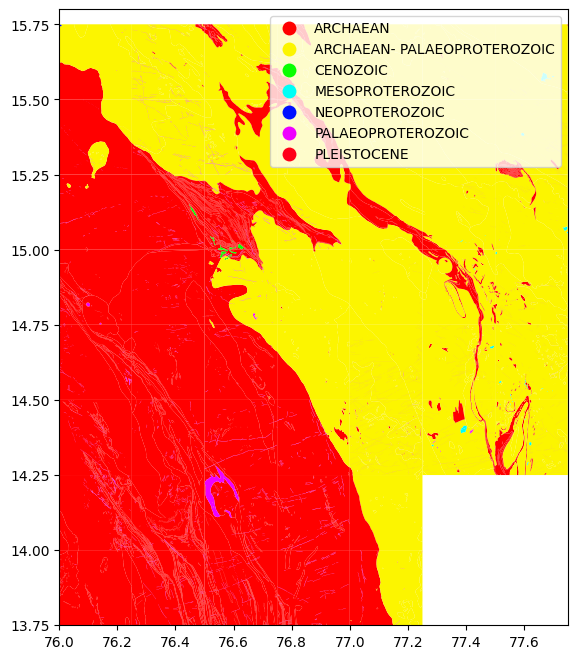

In [ ]:
gdf_50k_litho.plot(column="age", cmap='hsv', figsize=(8,8), legend=True)
plt.xlim([76, 77.75])
plt.ylim(13.75, 15.8)
plt.show()

### Mineralisation

In [ ]:
file_path_50k_mineral ='/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/50K/Geology map 50K/mineralization_gcs_ngdr_20250224141337303/mineralization_gcs_ngdr.shp'


gdf_50k_mineral = gpd.read_file(file_path_50k_mineral)

In [ ]:
gdf_50k_mineral.head()

gid input_cent toposheet_  edition_nu   geometry_i  commodity        x  \
0    4        BAN      57C09           2  570309003.0       GOLD  76.7065   
1   36        BAN      57C05           2  570305015.0  MANGANESE  76.4087   
2   71        BAN      57A12           2  570112010.0  MANGANESE  76.5434   
3   84        BAN      57A12           2  570112023.0  MANGANESE  76.6356   
4   91        BAN      57B08           2  570208008.0     COPPER  76.4406   

         y                   geometry  
0  13.7515  POINT (76.70649 13.75153)  
1  13.9802  POINT (76.40874 13.98021)  
2  15.0012   POINT (76.54336 15.0012)  
3  15.0052  POINT (76.63563 15.00519)  
4  14.1955  POINT (76.44058 14.19548)

<ipython-input-17-36b929646808>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('jet', num_commodities)  # Use a colormap for better visualization


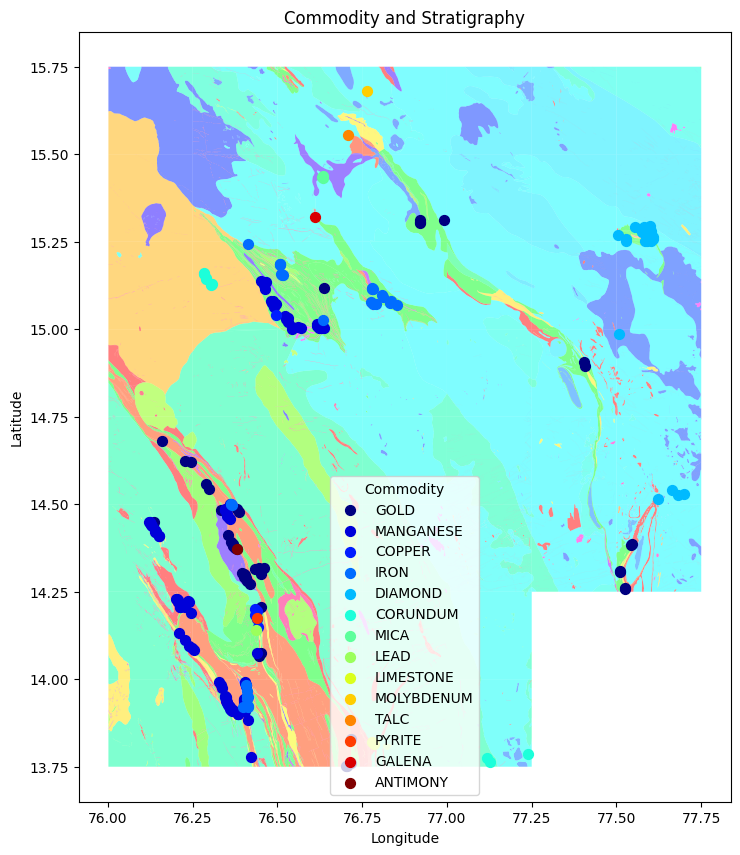

In [ ]:
# prompt: Plot "commodity" and  "stratigr_1" in a single image and put legends of commodity in colour. The commodity column is in the  'gdf_50k_mineral' and  "stratigr_1" is inside gdf_50k_litho

import matplotlib.pyplot as plt

# Assuming gdf_50k_mineral and gdf_50k_litho are already loaded as GeoDataFrames

fig, ax = plt.subplots(figsize=(10, 10))

# Plot 'stratigr_1' from gdf_50k_litho
gdf_50k_litho.plot(ax=ax, column='stratigr_1', cmap='hsv', alpha=0.5, legend=True)


# Plot 'commodity' from gdf_50k_mineral with a colormap and legend
# Create a colormap with unique colors for each commodity
unique_commodities = gdf_50k_mineral['commodity'].unique()
num_commodities = len(unique_commodities)
colors = plt.cm.get_cmap('jet', num_commodities)  # Use a colormap for better visualization

for i, commodity in enumerate(unique_commodities):
  subset = gdf_50k_mineral[gdf_50k_mineral['commodity'] == commodity]
  subset.plot(ax=ax, color=colors(i), label=commodity, markersize=50)

# Customize the plot
ax.set_title('Commodity and Stratigraphy')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend(title='Commodity')
plt.show()


##1.4 Cobined Data Include 50K geology, Geochemical and Geophysical Data

## Loading the data

The data has been converted in .csv format using the arcGiS module and the has been uploaded in the project

In [ ]:
file_path='/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/Final_data_union_all.csv'

final_data_union=pd.read_csv(file_path)

<ipython-input-5-3b7a9cc85ed4>:3: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  final_data_union=pd.read_csv(file_path)


In [ ]:
final_data_union.head()
final_data_union.shape

(23841, 37)

In [ ]:
# prompt: count duplicate rows in fina_data_union dataframe

# Count duplicate rows in the final_data_union DataFrame
duplicate_rows = final_data_union[final_data_union.duplicated()]
num_duplicate_rows = len(duplicate_rows)

print(f"Number of duplicate rows: {num_duplicate_rows}")

# Display the duplicate rows (optional)
print("\nDuplicate Rows:")
#duplicate_rows


Number of duplicate rows: 11810

Duplicate Rows:


In [ ]:
# prompt: Delete the duplicate rows and keep only the originals in the dataframe

# Assuming 'final_data_union' is your DataFrame as defined in the provided code.

# Drop duplicate rows and keep only the first occurrence
final_data_union = final_data_union.drop_duplicates(keep='first')

# Verify that duplicates have been removed
duplicate_rows_after = final_data_union[final_data_union.duplicated()]
num_duplicate_rows_after = len(duplicate_rows_after)

print(f"Number of duplicate rows after removal: {num_duplicate_rows_after}")

final_data_union.shape


Number of duplicate rows after removal: 0


(12031, 37)

In [ ]:
# prompt: show the columns of final_data_union

final_data_union.columns


Index(['X', 'Y', 'Elevation', 'BA', 'Commodity', 'Fold Type', 'Fault Type',
       'Age', 'Super Group', 'Group Name', 'Formation', 'Lithology',
       'Intrusive', 'SiO2', 'Al2O3', 'Fe2O3', 'TiO2', 'CaO', 'MgO', 'MnO',
       'Na2O', 'K2O', 'P2O5', 'LOI', 'Ba_ppm', 'Ga_ppm', 'Sc_ppm', 'V_ppm',
       'Th_ppm', 'Pb_ppm', 'Ni_ppm', 'Co_ppm', 'Rb_ppm', 'Sr_ppm', 'Cr_ppm',
       'Cu_ppm', 'Zn_ppm'],
      dtype='object')

In [ ]:

# Count the number of data points for each commodity
commodity_counts = final_data_union['Commodity'].value_counts()

commodity_counts


Commodity
GOLD          301
DIAMOND       203
MANGANESE     127
IRON           33
CORUNDUM       13
COPPER         11
TALC            3
MOLYBDENUM      2
MICA            1
GALENA          1
LIMESTONE       1
Name: count, dtype: int64

In [ ]:
# prompt: Export the dataframe as csv after deleting the duplicate rows

# Export the DataFrame to a CSV file
final_data_union.to_csv('final_data_Union_processed.csv', index=False)


# 2. Preparation of Data

Here combined data from 50k and 25k is imported. which is stored as a excel file and generated using all the attributes from lithology file. First Data will be prepared for 50k geology data and model will run on it. Sunsequently all the data will be used and the validation will be checked

## 2.1 Importing Library and Data QC

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Load the dataset
#openpyxl is one of the available engines that can handle Excel .xlsx files
file_path = '/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/Lithology_edited_50k.xlsx'
data = pd.read_excel(file_path, engine='openpyxl')

In [ ]:
data.head()

x        y             lithologic  \
0  76.7065  13.7515            META-BASALT   
1  76.7035  13.7533              ARGILLITE   
2  76.7174  13.7606  BANDED IRON FORMATION   
3  77.1281  13.7623       MIGMATITE GNEISS   
4  77.1180  13.7750       MIGMATITE GNEISS   

                                      major_mine  \
0  quartz, feldspar, chlorite, biotite, sericite   
1                                            NaN   
2                                            NaN   
3                  PLAGIOCLASE,CHLORITE,PYROXENE   
4                           QUARTZ,SERICITE,MICA   

                        accessory_       texture  \
0                          opaques     Schistose   
1  chlorite, biotite and magnetite           NaN   
2  chlorite, biotite and magnetite           NaN   
3                QUARTZ IN FRINGES  FINE GRAINED   
4                              NaN   SCHISTOSITY   

                       stratigr_1                   supergroup formation  \
0            ARCHAEAN-META-BASALT                      DHARWAR   HIRIYUR   
1              ARCHAEAN-ARGILLITE                      DHARWAR   HIRIYUR   
2  ARCHAEAN-BANDED-IRON-FORMATION                      DHARWAR   HIRIYUR   
3       ARCHAEAN-MIGMATITE-GNEISS  PENINSULAR GNEISSIC COMPLEX       NaN   
4       ARCHAEAN-MIGMATITE-GNEISS  PENINSULAR GNEISSIC COMPLEX       NaN   

                      group_name commodity  
0                    CHITRADURGA      GOLD  
1                    CHITRADURGA      GOLD  
2                    CHITRADURGA      GOLD  
3  PENINSULAR GNEISSIC COMPLEX-I  CORUNDUM  
4  PENINSULAR GNEISSIC COMPLEX-I  CORUNDUM

In [ ]:
# Clean the dataset
data_cleaned = data.drop(columns=['major_mine', 'accessory_', 'texture'])

In [ ]:
data_cleaned.shape

(1561, 8)

In [ ]:
# prompt: export data_cleaned as an excel file in the session

# Assuming 'data_cleaned' DataFrame is already defined as in your provided code.

# Export the DataFrame to an Excel file
data_cleaned.to_excel('data_cleaned_50K_geology.xlsx', index=False)  # Replace 'output.xlsx' with your desired file name


##2.2 Conversion of data from categorical to numerical



In [ ]:
# Ensure all categorical columns are of string type
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
data_cleaned[categorical_columns] = data_cleaned[categorical_columns].astype(str)

# Apply One-Hot Encoding for categorical features
X = data_cleaned.drop(columns=['commodity', 'x', 'y'])
X_encoded = pd.get_dummies(X)  # One-Hot Encoding for all categorical features

# Label Encoding for the target variable "commodity"
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data_cleaned['commodity'])



Checking the value counts of different commodity points

In [ ]:
columns=data_cleaned.columns
print(columns.dtype)
for col in columns:
    print(data_cleaned[col].dtype) # To get the data type of each column in the DataFrame

object
float64
float64
object
object
object
object
object
object


In [ ]:
# Display the assigned levels (class labels) for the commodity column
commodity_classes = label_encoder.classes_
print("Assigned levels for commodity classes:")
for index, level in enumerate(commodity_classes):
    print(f"Level {index}: {level}")

Assigned levels for commodity classes:
Level 0: 0
Level 1: ANTIMONY
Level 2: COPPER
Level 3: CORUNDUM
Level 4: DIAMOND
Level 5: GALENA
Level 6: GOLD
Level 7: IRON
Level 8: LEAD
Level 9: LIMESTONE
Level 10: MANGANESE
Level 11: MICA
Level 12: MOLYBDENUM
Level 13: PYRITE
Level 14: TALC


In [ ]:
# prompt: Give the value count for each commodity_classes from the above code

# Assuming 'gdf' is the GeoDataFrame loaded from the mine_quarry shapefile
commodity_counts = data_cleaned['commodity'].value_counts()
commodity_counts


commodity
0             1328
MANGANESE       99
GOLD            48
IRON            30
DIAMOND         29
CORUNDUM        10
COPPER           6
MICA             3
LIMESTONE        2
LEAD             1
PYRITE           1
GALENA           1
ANTIMONY         1
TALC             1
MOLYBDENUM       1
Name: count, dtype: int64

In [ ]:
# Drop rows with commodities having very few data points
commodities_to_drop = ['LIMESTONE', 'LEAD', 'PYRITE', 'GALENA', 'ANTIMONY', 'TALC', 'MOLYBDENUM']
data_cleaned_filtered = data_cleaned[~data_cleaned['commodity'].isin(commodities_to_drop)]

# Proceed with One-Hot Encoding for features and Label Encoding for the target
X_filtered = data_cleaned_filtered.drop(columns=['commodity', 'x', 'y','formation'])
X_encoded_filtered = pd.get_dummies(X_filtered)  # One-Hot Encoding for all categorical features

# Label Encoding for the target variable "commodity"
y_filtered = label_encoder.fit_transform(data_cleaned_filtered['commodity'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded_filtered, y_filtered, test_size=0.2, random_state=42)

In [ ]:
X_filtered.head()

lithologic                      stratigr_1  \
0            META-BASALT            ARCHAEAN-META-BASALT   
1              ARGILLITE              ARCHAEAN-ARGILLITE   
2  BANDED IRON FORMATION  ARCHAEAN-BANDED-IRON-FORMATION   
3       MIGMATITE GNEISS       ARCHAEAN-MIGMATITE-GNEISS   
4       MIGMATITE GNEISS       ARCHAEAN-MIGMATITE-GNEISS   

                    supergroup                     group_name  
0                      DHARWAR                    CHITRADURGA  
1                      DHARWAR                    CHITRADURGA  
2                      DHARWAR                    CHITRADURGA  
3  PENINSULAR GNEISSIC COMPLEX  PENINSULAR GNEISSIC COMPLEX-I  
4  PENINSULAR GNEISSIC COMPLEX  PENINSULAR GNEISSIC COMPLEX-I

In [ ]:
# prompt: Export the final combined X_filtered and y_filtered data

# Combine X_filtered and y_filtered
combined_data = X_encoded_filtered.copy()
combined_data['commodity'] = y_filtered

# Export the combined data to a CSV file
combined_data.to_csv('combined_data_50k_processed.csv', index=False)


##2.3 Coverting Data for different Models:

###Data for Managanese model

In [ ]:
file_path_data_cleaned_50K='/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/data_cleaned_50K_geology.xlsx'
data_cleaned_50K=pd.read_excel(file_path_data_cleaned_50K)


In [ ]:
# prompt: in data_cleaned_50k filter first delete all the rows where "commodity" =0. Then in the filtered data put commodity"Manganese" as 1 and all other commodities as 0. Name the output dataframe as data_cleaned_50k_manganese

# Filter out rows where 'commodity' is 0
data_cleaned_50k = data_cleaned_50K[data_cleaned_50K['commodity'] != 0]

# Create a new column 'Manganese' and set values based on the 'commodity' column
data_cleaned_50k_manganese = data_cleaned_50k.copy()
data_cleaned_50k_manganese['Manganese'] = data_cleaned_50k_manganese['commodity'].apply(lambda x: 1 if x == 'MANGANESE' else 0)


In [ ]:
# Display the first few rows of the resulting DataFrame
data_cleaned_50k_manganese.head(5)

x        y             lithologic                      stratigr_1  \
0  76.7065  13.7515            META-BASALT            ARCHAEAN-META-BASALT   
1  76.7035  13.7533              ARGILLITE              ARCHAEAN-ARGILLITE   
2  76.7174  13.7606  BANDED IRON FORMATION  ARCHAEAN-BANDED-IRON-FORMATION   
3  77.1281  13.7623       MIGMATITE GNEISS       ARCHAEAN-MIGMATITE-GNEISS   
4  77.1180  13.7750       MIGMATITE GNEISS       ARCHAEAN-MIGMATITE-GNEISS   

                    supergroup formation                     group_name  \
0                      DHARWAR   HIRIYUR                    CHITRADURGA   
1                      DHARWAR   HIRIYUR                    CHITRADURGA   
2                      DHARWAR   HIRIYUR                    CHITRADURGA   
3  PENINSULAR GNEISSIC COMPLEX       NaN  PENINSULAR GNEISSIC COMPLEX-I   
4  PENINSULAR GNEISSIC COMPLEX       NaN  PENINSULAR GNEISSIC COMPLEX-I   

  commodity  Manganese  
0      GOLD          0  
1      GOLD          0  
2      GOLD          0  
3  CORUNDUM          0  
4  CORUNDUM          0

In [ ]:
# prompt: show the value count for Manganese

# Assuming 'data_cleaned_50k_manganese' DataFrame is already defined as in your provided code.

# Count the occurrences of 0 and 1 in the 'Manganese' column
manganese_counts = data_cleaned_50k_manganese['Manganese'].value_counts()

manganese_counts


Manganese
0    134
1     99
Name: count, dtype: int64

### Data for Gold

In [ ]:
# prompt: in data_cleaned_50k filter first delete all the rows where "commodity" =0. Then in the filtered data put commodity"Manganese" as 1 and all other commodities as 0. Name the output dataframe as data_cleaned_50k_manganese

# Filter out rows where 'commodity' is 0
data_cleaned_50k = data_cleaned_50K[data_cleaned_50K['commodity'] != 0]

# Create a new column 'Manganese' and set values based on the 'commodity' column
data_cleaned_50k_GOLD = data_cleaned_50k.copy()
data_cleaned_50k_GOLD['GOLD'] = data_cleaned_50k_GOLD['commodity'].apply(lambda x: 1 if x == 'GOLD' else 0)

In [ ]:
# Display the first few rows of the resulting DataFrame
data_cleaned_50k_GOLD.head(5)

x        y             lithologic                      stratigr_1  \
0  76.7065  13.7515            META-BASALT            ARCHAEAN-META-BASALT   
1  76.7035  13.7533              ARGILLITE              ARCHAEAN-ARGILLITE   
2  76.7174  13.7606  BANDED IRON FORMATION  ARCHAEAN-BANDED-IRON-FORMATION   
3  77.1281  13.7623       MIGMATITE GNEISS       ARCHAEAN-MIGMATITE-GNEISS   
4  77.1180  13.7750       MIGMATITE GNEISS       ARCHAEAN-MIGMATITE-GNEISS   

                    supergroup formation                     group_name  \
0                      DHARWAR   HIRIYUR                    CHITRADURGA   
1                      DHARWAR   HIRIYUR                    CHITRADURGA   
2                      DHARWAR   HIRIYUR                    CHITRADURGA   
3  PENINSULAR GNEISSIC COMPLEX       NaN  PENINSULAR GNEISSIC COMPLEX-I   
4  PENINSULAR GNEISSIC COMPLEX       NaN  PENINSULAR GNEISSIC COMPLEX-I   

  commodity  GOLD  
0      GOLD     1  
1      GOLD     1  
2      GOLD     1  
3  CORUNDUM     0  
4  CORUNDUM     0

# 3. Build Model

## 3.1 MANGANESE MODEL

###MLP CLASSIFIER

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KernelDensity
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [ ]:
# Prepare the target variable: 1 for MANGANESE, 0 for all other commodities
training_data['target'] = (training_data['Commodity'] == 'MANGANESE').astype(int)

# Select relevant features: excluding 'Commodity' and 'target', keeping numeric columns
features = training_data.drop(columns=['Commodity', 'target'])
target = training_data['target']

# Categorical columns that need OneHotEncoding (treat 'Age' and 'Lithology' as categorical)
categorical_columns = ['Age', 'Lithology']

In [ ]:
features.head()

X        Y  BA       Age                 Lithology   SiO2  Al2O3  \
0  76.6068  13.8750 -76  ARCHAEAN                 ARGILLITE  62.49  13.58   
1  76.6790  13.8568 -76  ARCHAEAN                 ARGILLITE  62.49  13.58   
2  76.1517  14.4228 -93  ARCHAEAN  CHLORITE SERICITE SCHIST  51.73  16.50   
3  76.4336  15.1694 -54  ARCHAEAN               META-BASALT  37.62  11.31   
4  76.4966  15.0931 -54  ARCHAEAN               META-BASALT  37.62  11.31   

   Fe2O3  TiO2    CaO  ...  V_ppm  Th_ppm  Pb_ppm  Ni_ppm  Co_ppm  Rb_ppm  \
0   7.68  0.96  1.662  ...  119.4     4.0    16.7    93.3    24.1    55.6   
1   7.68  0.96  1.662  ...  119.4     4.0    16.7    93.3    24.1    55.6   
2   9.52  1.17  2.290  ...  253.0     8.0     9.0    94.0    34.0    47.0   
3  34.67  1.21  1.880  ...  173.5     2.0    11.3    91.9    31.3    40.1   
4  34.67  1.21  1.880  ...  173.5     2.0    11.3    91.9    31.3    40.1   

   Sr_ppm  Cr_ppm  Cu_ppm  Zn_ppm  
0   118.4   191.1    39.1    39.6  
1   118.4   191.1    39.1    39.6  
2    71.0   411.0    60.0    58.0  
3    31.0   258.4   101.3    42.4  
4    31.0   258.4   101.3    42.4  

[5 rows x 29 columns]

In [ ]:
# prompt: Use this 'feature' and 'target' data to create ANN model. Use train test split as 0.8 and convert the columns "Age', 'Lithology' in numerical with onehotencoding in the features Data before applying ANN

# Assuming 'features' and 'target' DataFrames are already defined and loaded as in your provided code.

# Create a column transformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['Age', 'Lithology'])
    ],
    remainder='passthrough'  # Keep other columns as they are
)

# Create a pipeline with the column transformer and the ANN model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('ann', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)) # Example ANN architecture
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy: 0.9803921568627451
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        82
           1       0.91      1.00      0.95        20

    accuracy                           0.98       102
   macro avg       0.95      0.99      0.97       102
weighted avg       0.98      0.98      0.98       102



In [ ]:
# prompt: Save the model in the file

import joblib

# Assuming 'model' is your trained MLPClassifier as defined in the provided code.
# Save the model to a file
filename = 'manganese_modelANN.sav'
joblib.dump(model, filename)


['manganese_modelANN.sav']

###ANN

####Initial data Building

In [ ]:
initial_Data_path = '/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/final_data_Union_10th_May.csv'
initial_data=pd.read_csv(initial_Data_path)

In [ ]:
for col in initial_data.columns:
    print(f"Column '{col}': {initial_data[col].dtype}")

In [ ]:
# prompt: convert the 'age' and 'Lithology' column into float using one hot encoder in the initial_data

import pandas as pd
from sklearn.preprocessing import OneHotEncoder # Import OneHotEncoder
from sklearn.compose import ColumnTransformer # Import ColumnTransformer

# Assuming 'initial_data' DataFrame is already defined and loaded as in your provided code.

# Create a column transformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['Age', 'Lithology'])
    ],
    remainder='passthrough'  # Keep other columns as they are
)

# Fit and transform the 'Age' and 'Lithology' columns
initial_data_encoded = preprocessor.fit_transform(initial_data)

# Convert the encoded data back to a DataFrame (optional, but helpful for inspection)
# initial_data_encoded is already a dense array, so toarray() is not needed
encoded_df = pd.DataFrame(initial_data_encoded, columns=preprocessor.get_feature_names_out())

# Now 'encoded_df' contains your data with 'Age' and 'Lithology' one-hot encoded
# You can replace 'initial_data' with 'encoded_df' if you want to work with the encoded data directly.


In [ ]:
# Example usage of the encoded DataFrame:
encoded_df.head()

onehot__Age_ARCHAEAN onehot__Age_ARCHAEAN- PALAEOPROTEROZOIC  \
0                  1.0                                     0.0   
1                  1.0                                     0.0   
2                  1.0                                     0.0   
3                  1.0                                     0.0   
4                  1.0                                     0.0   

  onehot__Age_CENOZOIC onehot__Age_PALAEOPROTEROZOIC  \
0                  0.0                           0.0   
1                  0.0                           0.0   
2                  0.0                           0.0   
3                  0.0                           0.0   
4                  0.0                           0.0   

  onehot__Lithology_ALKALI FELDSPAR GRANITE onehot__Lithology_AMPHIBOLITE  \
0                                       0.0                           0.0   
1                                       0.0                           0.0   
2                                       0.0                           0.0   
3                                       0.0                           0.0   
4                                       0.0                           0.0   

  onehot__Lithology_ANORTHOSITE GABBRO onehot__Lithology_ARGILLITE  \
0                                  0.0                         1.0   
1                                  0.0                         1.0   
2                                  0.0                         0.0   
3                                  0.0                         0.0   
4                                  0.0                         0.0   

  onehot__Lithology_BANDED FERRUGINOUS CHERT  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

  onehot__Lithology_BANDED IRON FORMATION  ... remainder__Th_ppm  \
0                                     0.0  ...               4.0   
1                                     0.0  ...               4.0   
2                                     0.0  ...               8.0   
3                                     0.0  ...              12.0   
4                                     0.0  ...               7.6   

  remainder__Pb_ppm remainder__Ni_ppm remainder__Co_ppm remainder__Rb_ppm  \
0              16.7              93.3              24.1              55.6   
1              16.7              93.3              24.1              55.6   
2               9.0              94.0              34.0              47.0   
3              29.7              34.7              14.6             142.1   
4              11.0              64.9              24.6              43.4   

  remainder__Sr_ppm remainder__Cr_ppm remainder__Cu_ppm remainder__Zn_ppm  \
0             118.4             191.1              39.1              39.6   
1             118.4             191.1              39.1              39.6   
2              71.0             411.0              60.0              58.0   
3             106.0              66.7              30.8              37.8   
4             154.6             109.9              37.0              40.9   

  remainder__Commodity  
0                 GOLD  
1                 GOLD  
2                 GOLD  
3                  NaN  
4                  NaN  

[5 rows x 77 columns]

In [ ]:
# prompt: export the encoded_df in csv format

# Export the encoded DataFrame to a CSV file
encoded_df.to_csv('final_data_training_lithology_encoded.csv', index=False)


####Code starting

In [ ]:
# --- 1. Load and preprocess the training dataset ---
# Load the training dataset
training_data_path = '/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/Final_data_training_commodity_encoded.csv'
training_data = pd.read_csv(training_data_path)

In [ ]:
for col in training_data.columns:
    print(f"Column '{col}': {training_data[col].dtype}")

Column 'onehot__Age_ARCHAEAN': int64
Column 'onehot__Age_ARCHAEAN- PALAEOPROTEROZOIC': int64
Column 'onehot__Age_CENOZOIC': int64
Column 'onehot__Age_PALAEOPROTEROZOIC': int64
Column 'onehot__Lithology_ALKALI FELDSPAR GRANITE': int64
Column 'onehot__Lithology_AMPHIBOLITE': int64
Column 'onehot__Lithology_ANORTHOSITE GABBRO': int64
Column 'onehot__Lithology_ARGILLITE': int64
Column 'onehot__Lithology_BANDED FERRUGINOUS CHERT': int64
Column 'onehot__Lithology_BANDED IRON FORMATION': int64
Column 'onehot__Lithology_BASALTIC KOMATIITE': int64
Column 'onehot__Lithology_BIOTITE GNEISS': int64
Column 'onehot__Lithology_CARBONACEOUS PHYLLITE': int64
Column 'onehot__Lithology_CHLORITE SCHIST': int64
Column 'onehot__Lithology_CHLORITE SERICITE SCHIST': int64
Column 'onehot__Lithology_CONGLOMERATE': int64
Column 'onehot__Lithology_DIORITE': int64
Column 'onehot__Lithology_DOLERITE': int64
Column 'onehot__Lithology_DOLOMITE': int64
Column 'onehot__Lithology_GNEISS': int64
Column 'onehot__Lithology

In [ ]:
# prompt: modify the below code. There is no categorical column in the data of training_data. Write ANN code to identify the 'remainder__Commodity' Manganese

import numpy as np
# Assuming 'training_data' DataFrame is already defined and loaded as in your provided code.

# Prepare the target variable: 1 for MANGANESE, 0 for other commodities
training_data['Manganese'] = (training_data['remainder__Commodity' ] == 'MANGANESE').astype(int)

# Select features (exclude 'Commodity', 'Manganese', and non-numeric columns)
# Identify numeric columns

features = training_data.drop(columns=['Manganese', 'remainder__Commodity'])
target = training_data['Manganese']

In [ ]:
print(features.shape)
print(target.shape)

(464, 76)
(464,)


In [ ]:
# prompt: Build an ANN model using the train and test dataset. Give all the training and validation accuracy with epoch. Keep the target column as int type
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Step 3: Check for NaN values in the features and target and handle them
if features.isnull().sum().any() or target.isnull().sum() > 0:
    features = features.fillna(0)  # or use other imputation techniques like fillna with median/mean
    target = target.fillna(0)

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 5: Scale features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Define the ANN model (using binary classification)
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Step 7: Compile the model with binary crossentropy for binary classification
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 8: Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stop], verbose=1)

# Step 9: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Step 10: Print training and validation accuracy for each epoch
for epoch in range(len(history.history['accuracy'])):
    print(f"Epoch {epoch+1}: Training Accuracy={history.history['accuracy'][epoch]:.4f}, Validation Accuracy={history.history['val_accuracy'][epoch]:.4f}")

# Print training and validation accuracy for each epoch
for epoch in range(len(history.history['accuracy'])):
    print(f"Epoch {epoch+1}: Training Accuracy={history.history['accuracy'][epoch]:.4f}, Validation Accuracy={history.history['val_accuracy'][epoch]:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8729 - loss: 0.5724 - val_accuracy: 0.8933 - val_loss: 0.3661
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9361 - loss: 0.3138 - val_accuracy: 0.9200 - val_loss: 0.2364
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9686 - loss: 0.1839 - val_accuracy: 0.9067 - val_loss: 0.1628
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9789 - loss: 0.1189 - val_accuracy: 1.0000 - val_loss: 0.1178
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9931 - loss: 0.0869 - val_accuracy: 1.0000 - val_loss: 0.0912
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0714 - val_accuracy: 1.0000 - val_loss: 0.0729
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0377 - val_accuracy: 1.0000 - val_loss: 0.0616
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0270 - val_accuracy: 1.0000 - v

In [ ]:


# Save the model
model.save('manganese_ann_model_All_DATA.h5')

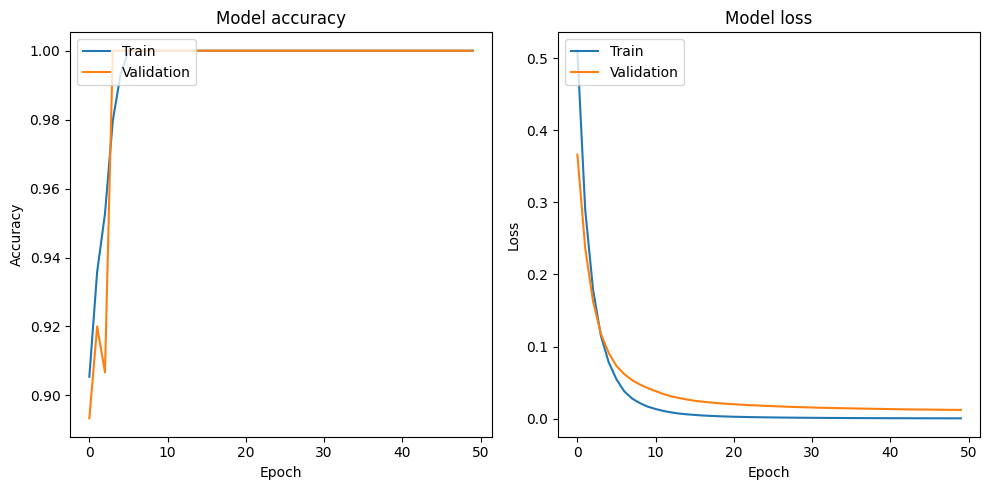

In [ ]:
# prompt: Plot Validation and trainng accuracy and error with iteration for the ANN model

import matplotlib.pyplot as plt

# Assuming 'history' is the training history object returned by model.fit()
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


### ANN Models without lithology input

In [ ]:
# --- 1. Load and preprocess the training dataset ---
# Load the training dataset
training_data_path = '/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/Commodity_Training_Points.xlsx'
training_data = pd.read_excel(training_data_path)

In [ ]:
# prompt: Plot different types of Commodity classes from the column 'Commodity' in the map from the training_data . The latitude and Longitude are named as X and Y column in the training_data. Keep different colour for different types of commodity

import matplotlib.pyplot as plt

# Assuming 'training_data' is your DataFrame and it has 'Commodity', 'X', and 'Y' columns.
# Replace 'X' and 'Y' with your actual column names if they are different.

# Create a colormap for different commodity types
unique_commodities = training_data['Commodity'].unique()
num_commodities = len(unique_commodities)
colors = plt.cm.get_cmap('viridis', num_commodities) # Using 'viridis' colormap, change if needed

# Create the plot
plt.figure(figsize=(10, 8))  # Adjust figure size if necessary

for i, commodity in enumerate(unique_commodities):
    subset = training_data[training_data['Commodity'] == commodity]
    plt.scatter(subset['X'], subset['Y'], label=commodity, color=colors(i), s=50) # Adjust 's' for marker size

plt.xlabel('Longitude') # Replace with your actual column name
plt.ylabel('Latitude') # Replace with your actual column name
plt.title('Commodity Distribution')
plt.legend(title='Commodity')
plt.grid(True)
plt.show()


In [ ]:
training_data.head()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Load data (assuming already done)
# training_data = pd.read_excel(...)

# Prepare target
training_data['target'] = (training_data['Commodity'] == 'MANGANESE').astype(int)
features = training_data.drop(columns=['Commodity', 'target','Age','Lithology', 'Ba_ppm'])
target = training_data['target']

In [ ]:
features.head()

In [ ]:
for col in features.columns:
    print(f"Column '{col}': {features[col].dtype}")

In [ ]:

# Scale numeric data (after one-hot)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=42)

# Build Keras Sequential ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Fit model
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_split=0.2, callbacks=[early_stop], verbose=1)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


In [ ]:
# prompt: Save the ANN model

# Assuming 'model' is your trained Keras Sequential model.
model.save('manganese_model_keras_ANN_excl_Litho_Ba_ADAM_EPOCH_100.h5')

In [ ]:
# prompt: Plot Validation and trainng accuracy and error with iteration for the ANN model

import matplotlib.pyplot as plt

# Assuming 'history' is the training history object returned by model.fit()
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


### Random Forest

In [ ]:
# Train and test using Random Forest on filtered data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Load the training dataset (assumes it's already loaded as 'training_data')
# training_data = pd.read_excel(...)

# Prepare target variable
training_data['target'] = (training_data['Commodity'] == 'MANGANESE').astype(int)
features = training_data.drop(columns=['Commodity', 'target'])
target = training_data['target']

# Categorical columns to be encoded
categorical_columns = ['Age', 'Lithology']

# Preprocessor: OneHotEncoder for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Pipeline: Preprocessing + RandomForest
model = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
# prompt: Export the imahe of Feature importance as image

import matplotlib.pyplot as plt
# Plot feature importance for Random Forest on filtered data
plt.figure(figsize=(10, 6))
plt.barh(X_encoded_filtered.columns, feature_importance_filtered)
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Random Forest - Filtered Data)')
plt.savefig('feature_importance.png') # Save the plot as a PNG image
plt.show()


In [ ]:
# prompt: Give the Top 15 important feature only and give it as image?

import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'X_encoded_filtered' and 'feature_importance_filtered' are already defined from previous code

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': X_encoded_filtered.columns,
                                      'Importance': feature_importance_filtered})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Get the top 15 features
top_15_features = feature_importance_df.head(15)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_15_features['Feature'], top_15_features['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 15 Important Features (Random Forest - Filtered Data)')
plt.gca().invert_yaxis() # Invert y-axis for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.savefig('top_15_features.png') # Save the plot as a PNG image
plt.show()


### Predictions

#### ANN model

In [ ]:
import tensorflow as tf
# Load the trained ANN model
model_path = '/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/MODELS/manganese_ann_model_ADAM_All_DATA.h5'
ann_model_manganese = tf.keras.models.load_model(model_path)

# Verify the model is loaded
print(ann_model_manganese.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         4,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,043 (27.52 KB)

 Trainable params: 7,041 (27.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


In [ ]:
import pandas as pd

# Load the prediction dataset
prediction_data_path = '/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/final_data_training_lithology_encoded_prediction.csv'
prediction_data = pd.read_csv(prediction_data_path)



In [ ]:
for col in prediction_data.columns:
    print(f"Column '{col}': {prediction_data[col].dtype}")

Column 'onehot__Age_ARCHAEAN': int64
Column 'onehot__Age_ARCHAEAN- PALAEOPROTEROZOIC': int64
Column 'onehot__Age_CENOZOIC': int64
Column 'onehot__Age_PALAEOPROTEROZOIC': int64
Column 'onehot__Lithology_ALKALI FELDSPAR GRANITE': int64
Column 'onehot__Lithology_AMPHIBOLITE': int64
Column 'onehot__Lithology_ANORTHOSITE GABBRO': int64
Column 'onehot__Lithology_ARGILLITE': int64
Column 'onehot__Lithology_BANDED FERRUGINOUS CHERT': int64
Column 'onehot__Lithology_BANDED IRON FORMATION': int64
Column 'onehot__Lithology_BASALTIC KOMATIITE': int64
Column 'onehot__Lithology_BIOTITE GNEISS': int64
Column 'onehot__Lithology_CARBONACEOUS PHYLLITE': int64
Column 'onehot__Lithology_CHLORITE SCHIST': int64
Column 'onehot__Lithology_CHLORITE SERICITE SCHIST': int64
Column 'onehot__Lithology_CONGLOMERATE': int64
Column 'onehot__Lithology_DIORITE': int64
Column 'onehot__Lithology_DOLERITE': int64
Column 'onehot__Lithology_DOLOMITE': int64
Column 'onehot__Lithology_GNEISS': int64
Column 'onehot__Lithology

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import load_model

# Step 3: Check for NaN values in the features and target and handle them
if prediction_data.isnull().sum().any() > 0:
    prediction_data = prediction_data.fillna(0)  # or use other imputation techniques like fillna with median/mean


# Step 5: Scale the numeric features (same as during training)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(prediction_data)

In [ ]:
# Step 6: Make predictions using the ANN model
probabilities = ann_model_manganese.predict(X_scaled)

# Step 7: Add the predictions back to the dataframe
prediction_data['prob_manganese'] = probabilities

# Step 8: Inspect the dataframe with predicted probabilities
print(prediction_data[['remainder__X', 'remainder__Y', 'prob_manganese']].head())

# Step 9: Save the results in an Excel file
output_path = '/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/MODELS/RESULTS/manganese_predictions_with_litho_output.xlsx'  # Update this path to where you want to save the output
prediction_data.to_excel(output_path, index=False)

# Confirm the output path
print(f"Predictions saved to {output_path}")

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
   remainder__X  remainder__Y  prob_manganese
0       76.6068       13.8750        0.000141
1       76.6790       13.8568        0.000140
2       76.1517       14.4228        0.000862
3       76.3777       14.1997        0.046987
4       76.5663       14.1250        0.003023
Predictions saved to /content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/MODELS/RESULTS/manganese_predictions_with_litho_output.xlsx


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


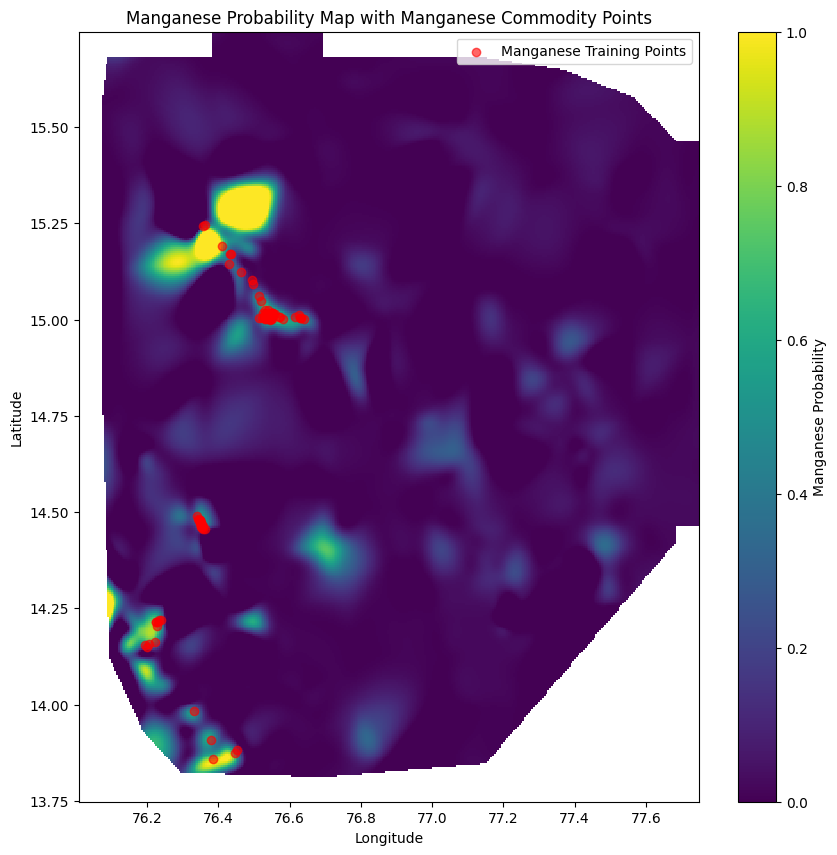

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.ndimage import gaussian_filter

# Step 1: Load the commodity training gold points data
training_data_path = '/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/Commodity_Training_Points.xlsx'  # Update with your file path
training_data = pd.read_excel(training_data_path)

# Filter out the GOLD points from the training data
gold_points = training_data[training_data['Commodity'] == 'MANGANESE']

# Step 2: Load the gold probability data (prediction data)
gold_predictions_path = '/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/MODELS/RESULTS/manganese_predictions_with_litho_output.xlsx'  # Update with your file path
gold_data = pd.read_excel(gold_predictions_path)

# Extract X, Y, and prob_gold from the dataset
x = gold_data['remainder__X']
y = gold_data['remainder__Y']
prob_gold = gold_data['prob_manganese']

# Step 3: Create grid coordinates for the gridded map
grid_resolution = 0.005  # Define grid resolution (adjust as necessary)
min_x, min_y = x.min(), y.min()
max_x, max_y = x.max(), y.max()

# Create meshgrid for the region
grid_x, grid_y = np.meshgrid(np.arange(min_x, max_x, grid_resolution), np.arange(min_y, max_y, grid_resolution))

# Step 4: Interpolate the data to fit the grid
grid_prob_gold = griddata((x, y), prob_gold, (grid_x, grid_y), method='cubic')

# Step 5: Apply Gaussian smoothing to the grid data for a smoother map
smoothed_grid_prob_gold = gaussian_filter(grid_prob_gold, sigma=3)

# Step 6: Plot the smoothed gridded gold probability map
fig, ax = plt.subplots(figsize=(10, 10))
c = ax.pcolormesh(grid_x, grid_y, smoothed_grid_prob_gold, shading='auto', cmap='viridis', vmin=0, vmax=1)
fig.colorbar(c, ax=ax, label="Manganese Probability")

# Step 7: Overlay the GOLD training points on top of the probability map
ax.scatter(gold_points['X'], gold_points['Y'], c='red', marker='o', label='Manganese Training Points', alpha=0.6)

# Add title and labels
ax.set_title('Manganese Probability Map with Manganese Commodity Points')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.legend()
plt.show()

#### ANN Model without lithology_Ba_input

In [ ]:
import tensorflow as tf
# Load the trained ANN model
model_path = '/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/MODELS/manganese_model_keras_ANN_excl_Litho_Ba_ADAM_EPOCH_100.h5'
ann_model_manganese_without_litho = tf.keras.models.load_model(model_path)

# Verify the model is loaded
print(ann_model_manganese_without_litho.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,779 (46.02 KB)

 Trainable params: 11,777 (46.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


In [ ]:

# Step 2: Load the prediction dataset
prediction_data_path = '/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/Prediction data points_ALL.csv'  # Update this path to your prediction data CSV file
prediction_data = pd.read_csv(prediction_data_path)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import load_model

# Step 3: Preprocessing

# Step 4: Fit the preprocessor (This step assumes that the preprocessor was fitted on the training data earlier)
# In this case, we're applying the preprocessor directly to the prediction data.
prediction_features = prediction_data.drop(columns=['Age','Lithology','Ba_ppm']) # Include 'X' and 'Y' in the features

# Step 5: Scale the numeric features (same as during training)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(prediction_features)



In [ ]:
# prompt: check data types of all columns of prediction_features

# Assuming prediction_features is defined as in your provided code.
# It should be a pandas DataFrame.

for col in prediction_features.columns:
    print(f"Column '{col}': {prediction_features[col].dtype}")


Column 'X': float64
Column 'Y': float64
Column 'BA': float64
Column 'SiO2': float64
Column 'Al2O3': float64
Column 'Fe2O3': float64
Column 'TiO2': float64
Column 'CaO': float64
Column 'MgO': float64
Column 'MnO': float64
Column 'Na2O': float64
Column 'K2O': float64
Column 'P2O5': float64
Column 'LOI': float64
Column 'Ga_ppm': float64
Column 'Sc_ppm': float64
Column 'V_ppm': float64
Column 'Th_ppm': float64
Column 'Pb_ppm': float64
Column 'Ni_ppm': float64
Column 'Co_ppm': float64
Column 'Rb_ppm': float64
Column 'Sr_ppm': float64
Column 'Cr_ppm': float64
Column 'Cu_ppm': float64
Column 'Zn_ppm': float64


In [ ]:
# Step 6: Make predictions using the ANN model
probabilities = ann_model_manganese_without_litho.predict(X_scaled)

# Step 7: Add the predictions back to the dataframe
prediction_data['prob_manganese'] = probabilities

# Step 8: Inspect the dataframe with predicted probabilities
print(prediction_data[['X', 'Y', 'prob_manganese']].head())

# Step 9: Save the results in an Excel file
output_path = '/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/MODELS/RESULTS/manganese_predictions_excl_litho_output.xlsx'  # Update this path to where you want to save the output
prediction_data.to_excel(output_path, index=False)

# Confirm the output path
print(f"Predictions saved to {output_path}")

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
         X        Y  prob_manganese
0  76.6068  13.8750        0.006673
1  76.6790  13.8568        0.007045
2  76.1517  14.4228        0.000652
3  76.3777  14.1997        0.045005
4  76.5663  14.1250        0.002854
Predictions saved to /content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/MODELS/RESULTS/manganese_predictions_excl_litho_output.xlsx


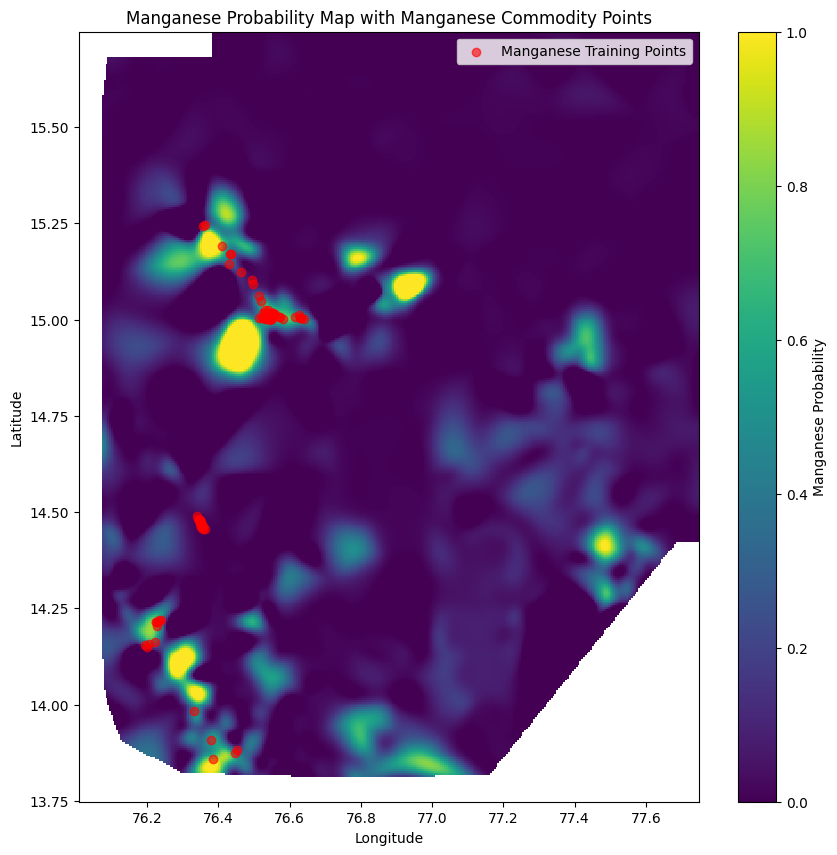

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.ndimage import gaussian_filter

# Step 1: Load the commodity training gold points data
training_data_path = '/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/Commodity_Training_Points.xlsx'  # Update with your file path
training_data = pd.read_excel(training_data_path)

# Filter out the GOLD points from the training data
gold_points = training_data[training_data['Commodity'] == 'MANGANESE']

# Step 2: Load the gold probability data (prediction data)
gold_predictions_path = '/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/MODELS/RESULTS/manganese_predictions_excl_litho_output.xlsx'  # Update with your file path
gold_data = pd.read_excel(gold_predictions_path)

# Extract X, Y, and prob_gold from the dataset
x = gold_data['X']
y = gold_data['Y']
prob_gold = gold_data['prob_manganese']

# Step 3: Create grid coordinates for the gridded map
grid_resolution = 0.005  # Define grid resolution (adjust as necessary)
min_x, min_y = x.min(), y.min()
max_x, max_y = x.max(), y.max()

# Create meshgrid for the region
grid_x, grid_y = np.meshgrid(np.arange(min_x, max_x, grid_resolution), np.arange(min_y, max_y, grid_resolution))

# Step 4: Interpolate the data to fit the grid
grid_prob_gold = griddata((x, y), prob_gold, (grid_x, grid_y), method='cubic')

# Step 5: Apply Gaussian smoothing to the grid data for a smoother map
smoothed_grid_prob_gold = gaussian_filter(grid_prob_gold, sigma=3)

# Step 6: Plot the smoothed gridded gold probability map
fig, ax = plt.subplots(figsize=(10, 10))
c = ax.pcolormesh(grid_x, grid_y, smoothed_grid_prob_gold, shading='auto', cmap='viridis', vmin=0, vmax=1)
fig.colorbar(c, ax=ax, label="Manganese Probability")

# Step 7: Overlay the GOLD training points on top of the probability map
ax.scatter(gold_points['X'], gold_points['Y'], c='red', marker='o', label='Manganese Training Points', alpha=0.6)

# Add title and labels
ax.set_title('Manganese Probability Map with Manganese Commodity Points')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.legend()
plt.show()

## 3.2 GOLD MODEL

### ANN MODEL WITHOUT LITHOLOGY INPUT

In [ ]:
# --- 1. Load and preprocess the training dataset ---
# Load the training dataset
training_data_path = '/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/Commodity_Training_Points.xlsx'
training_data = pd.read_excel(training_data_path)

In [ ]:
training_data['Commodity'].value_counts()

Commodity
GOLD         293
DIAMOND       97
MANGANESE     89
IRON          20
COPPER        11
Name: count, dtype: int64

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Load data (assuming already done)
# training_data = pd.read_excel(...)

# Prepare target
training_data['target'] = (training_data['Commodity'] == 'GOLD').astype(int)
features_gold = training_data.drop(columns=['Commodity', 'target','Age','Lithology', 'Ba_ppm'])
target_gold = training_data['target']

In [ ]:
# Scale numeric data (after one-hot)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_gold)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target_gold, test_size=0.2, random_state=42)

# Build Keras Sequential ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Fit model
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_split=0.2, callbacks=[early_stop], verbose=1)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7147 - loss: 0.6107 - val_accuracy: 0.9024 - val_loss: 0.4201
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8596 - loss: 0.3873 - val_accuracy: 0.9024 - val_loss: 0.3032
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8761 - loss: 0.2893 - val_accuracy: 0.9024 - val_loss: 0.2348
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8980 - loss: 0.2168 - val_accuracy: 0.9390 - val_loss: 0.1901
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8887 - loss: 0.2199 - val_accuracy: 0.9390 - val_loss: 0.1533
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9328 - loss: 0.1560 - val_accuracy: 0.9390 - val_loss: 0.1291
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9309 - loss: 0.1424 - val_accuracy: 0.9634 - val_loss: 0.1054
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9619 - loss: 0.1064 - val_accuracy: 0.

In [ ]:
# prompt: Save the ANN model

# Assuming 'model' is your trained Keras Sequential model.
model.save('gold_model_keras_ANN_excl_Litho_Ba_ADAM_EPOCH_100.h5')

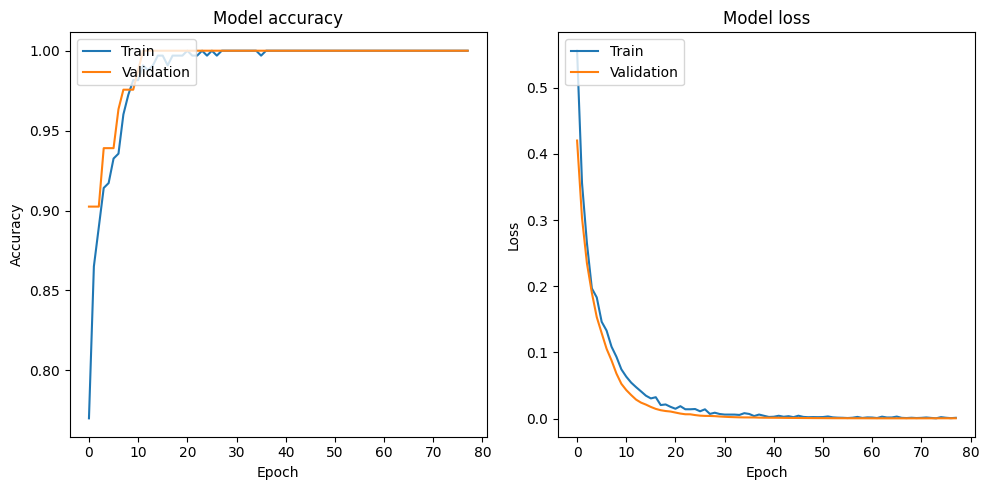

In [ ]:
# prompt: Plot Validation and trainng accuracy and error with iteration for the ANN model

import matplotlib.pyplot as plt

# Assuming 'history' is the training history object returned by model.fit()
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


### ANN MODEL WITH ALL input

In [ ]:
# --- 1. Load and preprocess the training dataset ---
# Load the training dataset
training_data_path = '/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/Final_data_training_commodity_encoded.csv'
training_data = pd.read_csv(training_data_path)

In [ ]:
# prompt: modify the below code. There is no categorical column in the data of training_data. Write ANN code to identify the 'remainder__Commodity' Manganese

import numpy as np
# Assuming 'training_data' DataFrame is already defined and loaded as in your provided code.

# Prepare the target variable: 1 for MANGANESE, 0 for other commodities
training_data['Gold'] = (training_data['remainder__Commodity' ] == 'GOLD').astype(int)

# Select features (exclude 'Commodity', 'Manganese', and non-numeric columns)
# Identify numeric columns

features = training_data.drop(columns=['Gold', 'remainder__Commodity'])
target = training_data['Gold']

In [ ]:
print(features.shape)
print(target.shape)

(464, 76)
(464,)


In [ ]:
# prompt: Build an ANN model using the train and test dataset. Give all the training and validation accuracy with epoch. Keep the target column as int type
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Step 3: Check for NaN values in the features and target and handle them
if features.isnull().sum().any() or target.isnull().sum() > 0:
    features = features.fillna(0)  # or use other imputation techniques like fillna with median/mean
    target = target.fillna(0)

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 5: Scale features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Define the ANN model (using binary classification)
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Step 7: Compile the model with binary crossentropy for binary classification
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 8: Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stop], verbose=1)

# Step 9: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Step 10: Print training and validation accuracy for each epoch
for epoch in range(len(history.history['accuracy'])):
    print(f"Epoch {epoch+1}: Training Accuracy={history.history['accuracy'][epoch]:.4f}, Validation Accuracy={history.history['val_accuracy'][epoch]:.4f}")

# Print training and validation accuracy for each epoch
for epoch in range(len(history.history['accuracy'])):
    print(f"Epoch {epoch+1}: Training Accuracy={history.history['accuracy'][epoch]:.4f}, Validation Accuracy={history.history['val_accuracy'][epoch]:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.7772 - loss: 0.6236 - val_accuracy: 0.7067 - val_loss: 0.5436
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8612 - loss: 0.3879 - val_accuracy: 0.7733 - val_loss: 0.4164
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9071 - loss: 0.2552 - val_accuracy: 0.7867 - val_loss: 0.3379
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9464 - loss: 0.1841 - val_accuracy: 0.8800 - val_loss: 0.2809
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9516 - loss: 0.1503 - val_accuracy: 0.8800 - val_loss: 0.2359
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9495 - loss: 0.1241 - val_accuracy: 0.9200 - val_loss: 0.2006
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9669 - loss: 0.1115 - val_accuracy: 0.9467 - val_loss: 0.1710
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9835 - loss: 0.0846 - val_accuracy: 0.9467 - v

In [ ]:
# Save the model
model.save('gold_ann_model_All_DATA.h5')

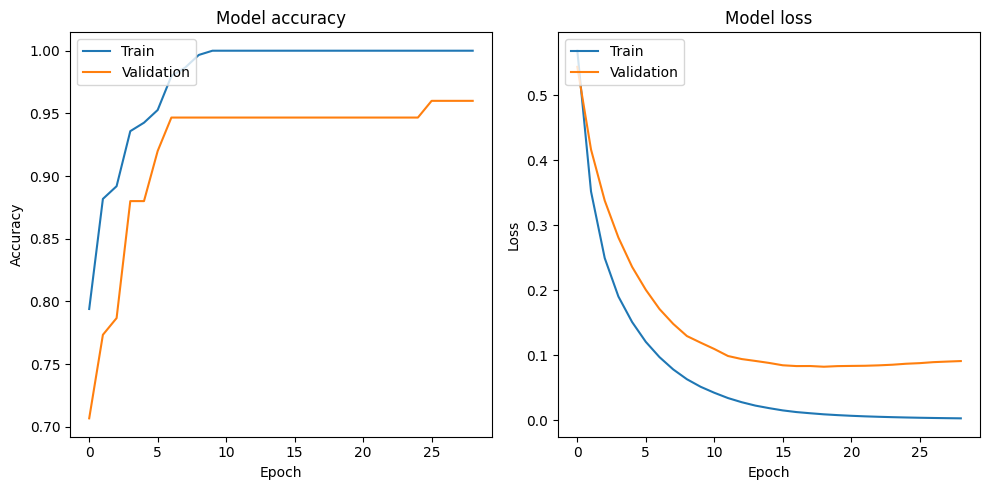

In [ ]:
# prompt: Plot Validation and trainng accuracy and error with iteration for the ANN model

import matplotlib.pyplot as plt

# Assuming 'history' is the training history object returned by model.fit()
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


### PREDICTIONS

#### ANN WITHOUT LITHOLOGY INPUT

In [ ]:
import tensorflow as tf
# Load the trained ANN model
model_path = '/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/MODELS/gold_model_keras_ANN_excl_Litho_Ba_ADAM_EPOCH_100.h5'
ann_model_gold_without_litho = tf.keras.models.load_model(model_path)

# Verify the model is loaded
print(ann_model_gold_without_litho.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,779 (46.02 KB)

 Trainable params: 11,777 (46.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


In [ ]:
# Step 2: Load the prediction dataset
prediction_data_path = '/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/Prediction data points_ALL.csv'  # Update this path to your prediction data CSV file
prediction_data = pd.read_csv(prediction_data_path)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import load_model

# Step 3: Preprocessing

# Step 4: Fit the preprocessor (This step assumes that the preprocessor was fitted on the training data earlier)
# In this case, we're applying the preprocessor directly to the prediction data.
prediction_features = prediction_data.drop(columns=['Age','Lithology','Ba_ppm']) # Include 'X' and 'Y' in the features

# Step 5: Scale the numeric features (same as during training)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(prediction_features)

In [ ]:
# Step 6: Make predictions using the ANN model
probabilities = ann_model_gold_without_litho.predict(X_scaled)

# Step 7: Add the predictions back to the dataframe
prediction_data['prob_gold'] = probabilities

# Step 8: Inspect the dataframe with predicted probabilities
print(prediction_data[['X', 'Y', 'prob_gold']].head())

# Step 9: Save the results in an Excel file
output_path = '/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/MODELS/RESULTS/gold_predictions_excl_litho_output.xlsx'  # Update this path to where you want to save the output
prediction_data.to_excel(output_path, index=False)

# Confirm the output path
print(f"Predictions saved to {output_path}")

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
         X        Y  prob_gold
0  76.6068  13.8750   0.999467
1  76.6790  13.8568   0.999383
2  76.1517  14.4228   0.999838
3  76.3777  14.1997   0.000006
4  76.5663  14.1250   0.998152
Predictions saved to /content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/MODELS/RESULTS/gold_predictions_excl_litho_output.xlsx


In [ ]:
prediction_data.head()

X        Y    BA       Age                 Lithology   SiO2   Al2O3  \
0  76.6068  13.8750 -76.0  ARCHAEAN                 ARGILLITE  62.49  13.580   
1  76.6790  13.8568 -76.0  ARCHAEAN                 ARGILLITE  62.49  13.580   
2  76.1517  14.4228 -93.0  ARCHAEAN  CHLORITE SERICITE SCHIST  51.73  16.500   
3  76.3777  14.1997 -90.0  ARCHAEAN              GREY GRANITE  60.67  16.600   
4  76.5663  14.1250 -72.0  ARCHAEAN               META-BASALT  58.16  13.822   

   Fe2O3  TiO2    CaO  ...  Th_ppm  Pb_ppm  Ni_ppm  Co_ppm  Rb_ppm  Sr_ppm  \
0   7.68  0.96  1.662  ...     4.0    16.7    93.3    24.1    55.6   118.4   
1   7.68  0.96  1.662  ...     4.0    16.7    93.3    24.1    55.6   118.4   
2   9.52  1.17  2.290  ...     8.0     9.0    94.0    34.0    47.0    71.0   
3   5.02  0.66  2.090  ...    12.0    29.7    34.7    14.6   142.1   106.0   
4   6.10  0.83  5.810  ...     7.6    11.0    64.9    24.6    43.4   154.6   

  Cr_ppm  Cu_ppm  Zn_ppm  prob_gold  
0  191.1    39.1    39.6   0.999467  
1  191.1    39.1    39.6   0.999383  
2  411.0    60.0    58.0   0.999838  
3   66.7    30.8    37.8   0.000006  
4  109.9    37.0    40.9   0.998152  

[5 rows x 30 columns]

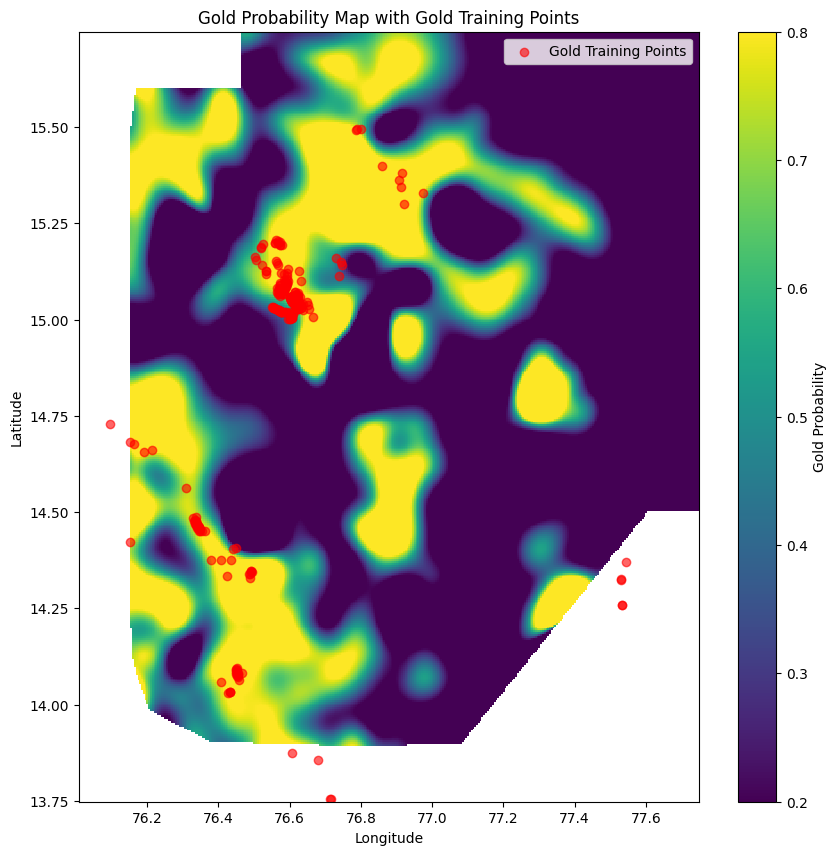

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.ndimage import gaussian_filter

# Step 1: Load the commodity training gold points data
training_data_path = '/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/Commodity_Training_Points.xlsx'  # Update with your file path
training_data = pd.read_excel(training_data_path)

# Filter out the GOLD points from the training data
gold_points = training_data[training_data['Commodity'] == 'GOLD']

# Step 2: Load the gold probability data (prediction data)
gold_predictions_path = '/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/MODELS/RESULTS/gold_predictions_excl_litho_output.xlsx'  # Update with your file path
gold_data = pd.read_excel(gold_predictions_path)

# Extract X, Y, and prob_gold from the dataset
x = gold_data['X']
y = gold_data['Y']
prob_gold = gold_data['prob_gold']

# Step 3: Create grid coordinates for the gridded map
grid_resolution = 0.005  # Define grid resolution (adjust as necessary)
min_x, min_y = x.min(), y.min()
max_x, max_y = x.max(), y.max()

# Create meshgrid for the region
grid_x, grid_y = np.meshgrid(np.arange(min_x, max_x, grid_resolution), np.arange(min_y, max_y, grid_resolution))

# Step 4: Interpolate the data to fit the grid
grid_prob_gold = griddata((x, y), prob_gold, (grid_x, grid_y), method='cubic')

# Step 5: Apply Gaussian smoothing to the grid data for a smoother map
smoothed_grid_prob_gold = gaussian_filter(grid_prob_gold, sigma=7)

# Step 6: Plot the smoothed gridded gold probability map
fig, ax = plt.subplots(figsize=(10, 10))
c = ax.pcolormesh(grid_x, grid_y, smoothed_grid_prob_gold, shading='auto', cmap='viridis', vmin=0.2, vmax=0.8)
fig.colorbar(c, ax=ax, label="Gold Probability")

# Step 7: Overlay the GOLD training points on top of the probability map
ax.scatter(gold_points['X'], gold_points['Y'], c='red', marker='o', label='Gold Training Points', alpha=0.6)

# Add title and labels
ax.set_title('Gold Probability Map with Gold Training Points')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.legend()
plt.show()

####ANN with all input

In [ ]:
import tensorflow as tf
# Load the trained ANN model
model_path = '/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/MODELS/gold_ann_model_All_DATA.h5'
ann_model_gold = tf.keras.models.load_model(model_path)

# Verify the model is loaded
print(ann_model_gold.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │         4,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,043 (27.52 KB)

 Trainable params: 7,041 (27.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


In [ ]:
import pandas as pd

# Load the prediction dataset
prediction_data_path = '/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/final_data_training_lithology_encoded_prediction.csv'
prediction_data = pd.read_csv(prediction_data_path)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import load_model

# Step 3: Check for NaN values in the features and target and handle them
if prediction_data.isnull().sum().any() > 0:
    prediction_data = prediction_data.fillna(0)  # or use other imputation techniques like fillna with median/mean


# Step 5: Scale the numeric features (same as during training)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(prediction_data)

In [ ]:
# Step 6: Make predictions using the ANN model
probabilities = ann_model_gold.predict(X_scaled)

# Step 7: Add the predictions back to the dataframe
prediction_data['prob_gold'] = probabilities

# Step 8: Inspect the dataframe with predicted probabilities
print(prediction_data[['remainder__X', 'remainder__Y', 'prob_gold']].head())

# Step 9: Save the results in an Excel file
output_path = '/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/MODELS/RESULTS/gold_predictions_with_litho_output.xlsx'  # Update this path to where you want to save the output
prediction_data.to_excel(output_path, index=False)

# Confirm the output path
print(f"Predictions saved to {output_path}")

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
   remainder__X  remainder__Y  prob_gold
0       76.6068       13.8750   0.998976
1       76.6790       13.8568   0.998943
2       76.1517       14.4228   0.993814
3       76.3777       14.1997   0.011654
4       76.5663       14.1250   0.995860
Predictions saved to /content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/MODELS/RESULTS/gold_predictions_with_litho_output.xlsx


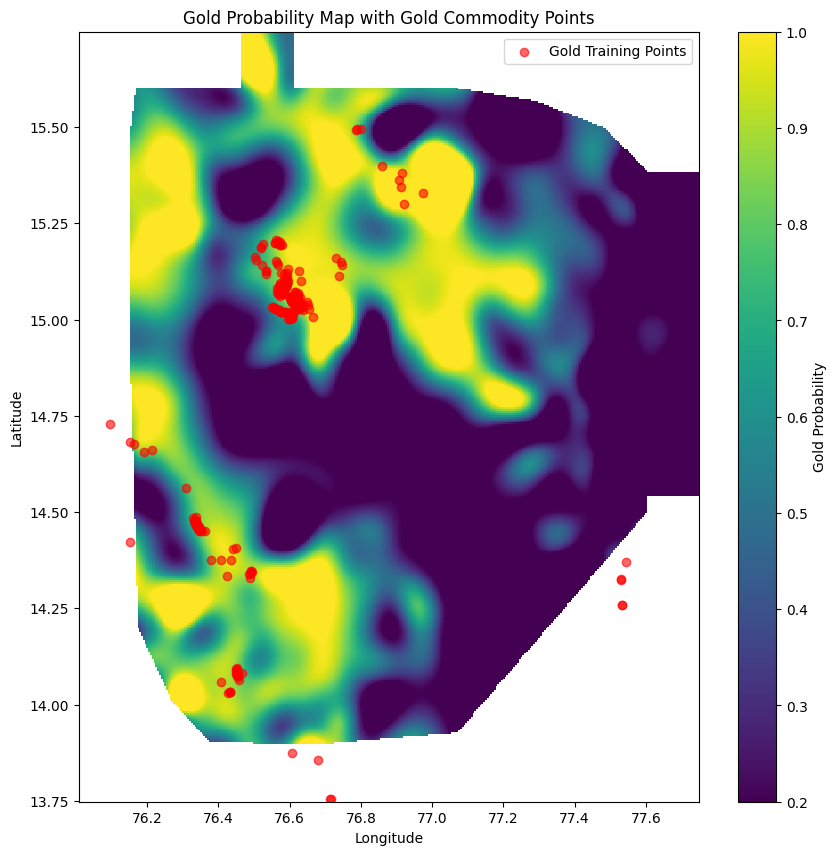

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.ndimage import gaussian_filter

# Step 1: Load the commodity training gold points data
training_data_path = '/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/Commodity_Training_Points.xlsx'  # Update with your file path
training_data = pd.read_excel(training_data_path)

# Filter out the GOLD points from the training data
gold_points = training_data[training_data['Commodity'] == 'GOLD']

# Step 2: Load the gold probability data (prediction data)
gold_predictions_path = '/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/MODELS/RESULTS/gold_predictions_with_litho_output.xlsx'  # Update with your file path
gold_data = pd.read_excel(gold_predictions_path)

# Extract X, Y, and prob_gold from the dataset
x = gold_data['remainder__X']
y = gold_data['remainder__Y']
prob_gold = gold_data['prob_gold']

# Step 3: Create grid coordinates for the gridded map
grid_resolution = 0.005  # Define grid resolution (adjust as necessary)
min_x, min_y = x.min(), y.min()
max_x, max_y = x.max(), y.max()

# Create meshgrid for the region
grid_x, grid_y = np.meshgrid(np.arange(min_x, max_x, grid_resolution), np.arange(min_y, max_y, grid_resolution))

# Step 4: Interpolate the data to fit the grid
grid_prob_gold = griddata((x, y), prob_gold, (grid_x, grid_y), method='cubic')

# Step 5: Apply Gaussian smoothing to the grid data for a smoother map
smoothed_grid_prob_gold = gaussian_filter(grid_prob_gold, sigma=7)

# Step 6: Plot the smoothed gridded gold probability map
fig, ax = plt.subplots(figsize=(10, 10))
c = ax.pcolormesh(grid_x, grid_y, smoothed_grid_prob_gold, shading='auto', cmap='viridis', vmin=0.2, vmax=1)
fig.colorbar(c, ax=ax, label="Gold Probability")

# Step 7: Overlay the GOLD training points on top of the probability map
ax.scatter(gold_points['X'], gold_points['Y'], c='red', marker='o', label='Gold Training Points', alpha=0.6)

# Add title and labels
ax.set_title('Gold Probability Map with Gold Commodity Points')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.legend()
plt.show()

##3.3 IRON MODEL

### ANN without Lithology, Ba

In [ ]:
# Prepare the target variable: 1 for MANGANESE, 0 for all other commodities
training_data['target'] = (training_data['Commodity'] == 'IRON').astype(int)

# Select relevant features: excluding 'Commodity' and 'target', keeping numeric columns
features_iron = training_data.drop(columns=['Commodity', 'target','Age','Lithology', 'Ba_ppm'])
target_iron = training_data['target']

# Categorical columns that need OneHotEncoding (treat 'Age' and 'Lithology' as categorical)
categorical_columns = ['Age', 'Lithology']

In [ ]:
for col in features_iron.columns:
    print(f"Column '{col}': {features_iron[col].dtype}")

Column 'X': float64
Column 'Y': float64
Column 'BA': int64
Column 'SiO2': float64
Column 'Al2O3': float64
Column 'Fe2O3': float64
Column 'TiO2': float64
Column 'CaO': float64
Column 'MgO': float64
Column 'MnO': float64
Column 'Na2O': float64
Column 'K2O': float64
Column 'P2O5': float64
Column 'LOI': float64
Column 'Ga_ppm': float64
Column 'Sc_ppm': float64
Column 'V_ppm': float64
Column 'Th_ppm': float64
Column 'Pb_ppm': float64
Column 'Ni_ppm': float64
Column 'Co_ppm': float64
Column 'Rb_ppm': float64
Column 'Sr_ppm': float64
Column 'Cr_ppm': float64
Column 'Cu_ppm': float64
Column 'Zn_ppm': float64


In [ ]:

# Scale numeric data (after one-hot)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_iron)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target_iron, test_size=0.2, random_state=42)

# Build Keras Sequential ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Fit model
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_split=0.2, callbacks=[early_stop], verbose=1)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9098 - loss: 0.4901 - val_accuracy: 0.9512 - val_loss: 0.2889
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9587 - loss: 0.2405 - val_accuracy: 0.9512 - val_loss: 0.2045
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9723 - loss: 0.1455 - val_accuracy: 0.9512 - val_loss: 0.1753
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9602 - loss: 0.1561 - val_accuracy: 0.9512 - val_loss: 0.1427
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9530 - loss: 0.1369 - val_accuracy: 0.9512 - val_loss: 0.1188
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9703 - loss: 0.0749 - val_accuracy: 0.9512 - val_loss: 0.1081
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9719 - loss: 0.0723 - val_accuracy: 0.9512 - val_loss: 0.0973
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9677 - loss: 0.0808 - val_accuracy: 0.9756 - val_loss: 0

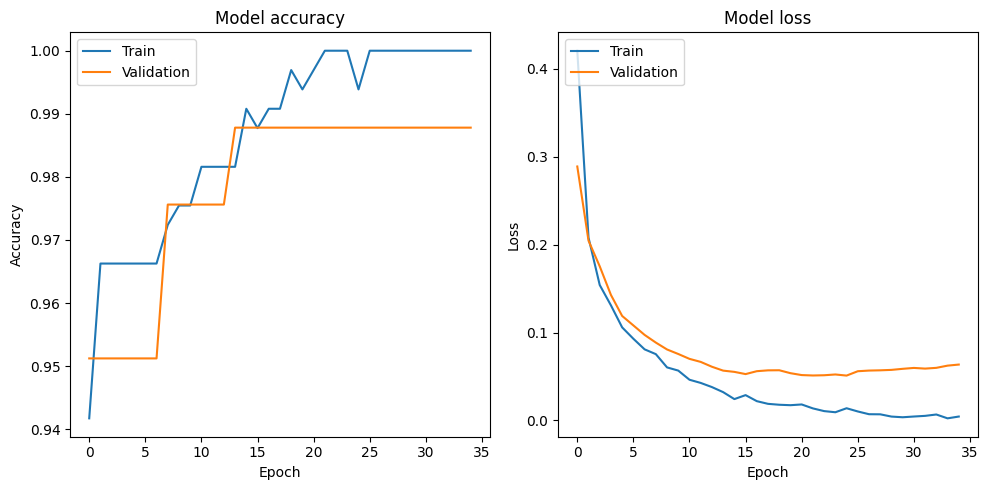

In [ ]:
# prompt: Plot accuracy and error plot for the ANN model

import matplotlib.pyplot as plt

# Assuming 'history' is the training history object from model.fit()
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
# prompt: Save the ANN model

# Assuming 'model' is your trained Keras Sequential model.
model.save('iron_model_keras_ANN_excl_Litho_Ba_ADAM_EPOCH_100.h5')

###Predictions

#### ANN Model Without Lithology, Ba input

In [ ]:
import tensorflow as tf
# Load the trained ANN model
model_path = '/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/MODELS/iron_model_keras_ANN_excl_Litho_Ba_ADAM_EPOCH_100.h5'
ann_model_iron_without_litho = tf.keras.models.load_model(model_path)

# Verify the model is loaded
print(ann_model_iron_without_litho.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,779 (46.02 KB)

 Trainable params: 11,777 (46.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


In [ ]:
# Step 2: Load the prediction dataset
prediction_data_path = '/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/Prediction data points_ALL.csv'  # Update this path to your prediction data CSV file
prediction_data = pd.read_csv(prediction_data_path)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import load_model

# Step 3: Preprocessing

# Step 4: Fit the preprocessor (This step assumes that the preprocessor was fitted on the training data earlier)
# In this case, we're applying the preprocessor directly to the prediction data.
prediction_features = prediction_data.drop(columns=['Age','Lithology','Ba_ppm']) # Include 'X' and 'Y' in the features

# Step 5: Scale the numeric features (same as during training)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(prediction_features)


In [ ]:
# Step 6: Make predictions using the ANN model
probabilities = ann_model_iron_without_litho.predict(X_scaled)

# Step 7: Add the predictions back to the dataframe
prediction_data['prob_iron'] = probabilities

# Step 8: Inspect the dataframe with predicted probabilities
print(prediction_data[['X', 'Y', 'prob_iron']].head())

# Step 9: Save the results in an Excel file
output_path = '/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/MODELS/RESULTS/iron_predictions_excl_litho_output.xlsx'  # Update this path to where you want to save the output
prediction_data.to_excel(output_path, index=False)

# Confirm the output path
print(f"Predictions saved to {output_path}")

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
         X        Y  prob_iron
0  76.6068  13.8750   0.004321
1  76.6790  13.8568   0.004514
2  76.1517  14.4228   0.000050
3  76.3777  14.1997   0.149428
4  76.5663  14.1250   0.009266
Predictions saved to /content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/MODELS/RESULTS/iron_predictions_excl_litho_output.xlsx


In [ ]:
# prompt: Create a map with X, Y and prob_iron and overlay training IRON Points from training_data dataframe on it

import folium

# Assuming prediction_data and training_data are defined as in your provided code.

# Create a map centered around the average coordinates
m = folium.Map(location=[prediction_data['Y'].mean(), prediction_data['X'].mean()], zoom_start=10)

# Add prediction points to the map
for index, row in prediction_data.iterrows():
    folium.CircleMarker(
        location=[row['Y'], row['X']],
        radius=5,
        color='blue',  # Color for prediction points
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"Prob_Iron: {row['prob_iron']:.2f}"
    ).add_to(m)

# Add training IRON points to the map
for index, row in training_data[training_data['Commodity'] == 'IRON'].iterrows():
    folium.CircleMarker(
        location=[row['Y'], row['X']],
        radius=7,
        color='red',  # Color for training IRON points
        fill=True,
        fill_color='red',
        fill_opacity=0.8,
        popup="Training Iron Point"
    ).add_to(m)

# Display the map
m


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


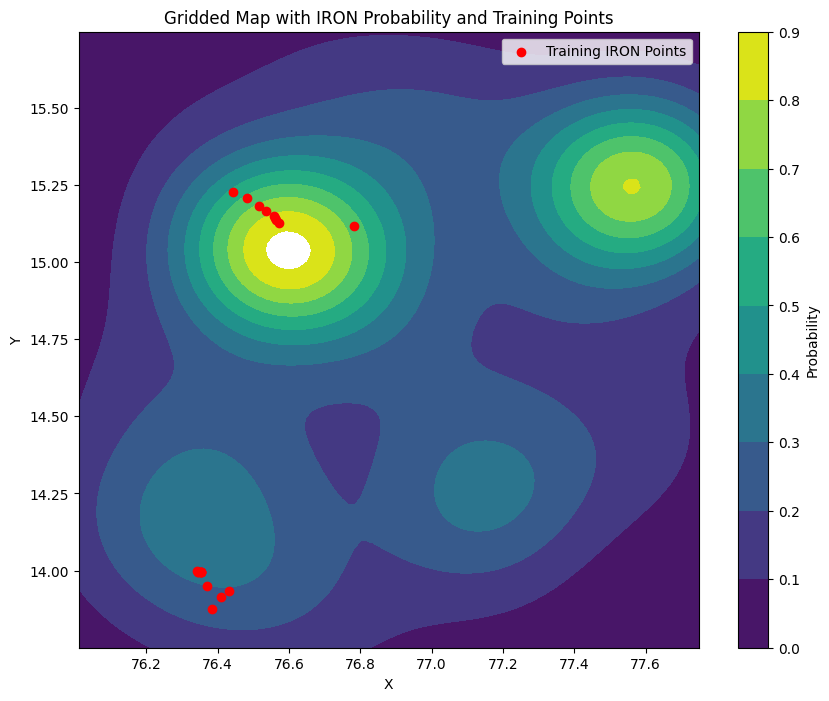

In [ ]:
# prompt: plot iron probability in a gridded map with the IRON points overlaid on it
import folium
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Assuming prediction_data and training_data are defined as in your provided code.

# Create a map centered around the average coordinates
m = folium.Map(location=[prediction_data['Y'].mean(), prediction_data['X'].mean()], zoom_start=10)

# Add prediction points to the map
for index, row in prediction_data.iterrows():
    folium.CircleMarker(
        location=[row['Y'], row['X']],
        radius=5,
        color='blue',  # Color for prediction points
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"Prob_Iron: {row['prob_iron']:.2f}"
    ).add_to(m)

# Add training IRON points to the map
for index, row in training_data[training_data['Commodity'] == 'IRON'].iterrows():
    folium.CircleMarker(
        location=[row['Y'], row['X']],
        radius=7,
        color='red',  # Color for training IRON points
        fill=True,
        fill_color='red',
        fill_opacity=0.8,
        popup="Training Iron Point"
    ).add_to(m)

# Display the map
m

# Assuming prediction_data is your DataFrame with 'X', 'Y', and 'prob_iron'
# Create the grid
x_coords = np.linspace(prediction_data['X'].min(), prediction_data['X'].max(), 100)
y_coords = np.linspace(prediction_data['Y'].min(), prediction_data['Y'].max(), 100)
X, Y = np.meshgrid(x_coords, y_coords)
positions = np.vstack([X.ravel(), Y.ravel()])

# Apply Kernel Density Estimation to get probability values for the grid
kde = KernelDensity(bandwidth=0.2, kernel='gaussian') # Adjust bandwidth as needed
kde.fit(prediction_data[['X', 'Y']]) # Use only the X and Y coordinates for KDE
Z = np.reshape(np.exp(kde.score_samples(positions.T)), X.shape)


# Create the contour plot
contour_levels = np.arange(0, 1, 0.1) # Probability contour interval of 0.1

plt.figure(figsize=(10, 8))
contour = plt.contourf(X, Y, Z, levels=contour_levels, cmap='viridis')  # Use a suitable colormap
plt.colorbar(contour, label='Probability')

# Overlay training IRON points
plt.scatter(training_data[training_data['Commodity'] == 'IRON']['X'],
            training_data[training_data['Commodity'] == 'IRON']['Y'],
            color='red', label='Training IRON Points', marker='o')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gridded Map with IRON Probability and Training Points')
plt.legend()
plt.show()


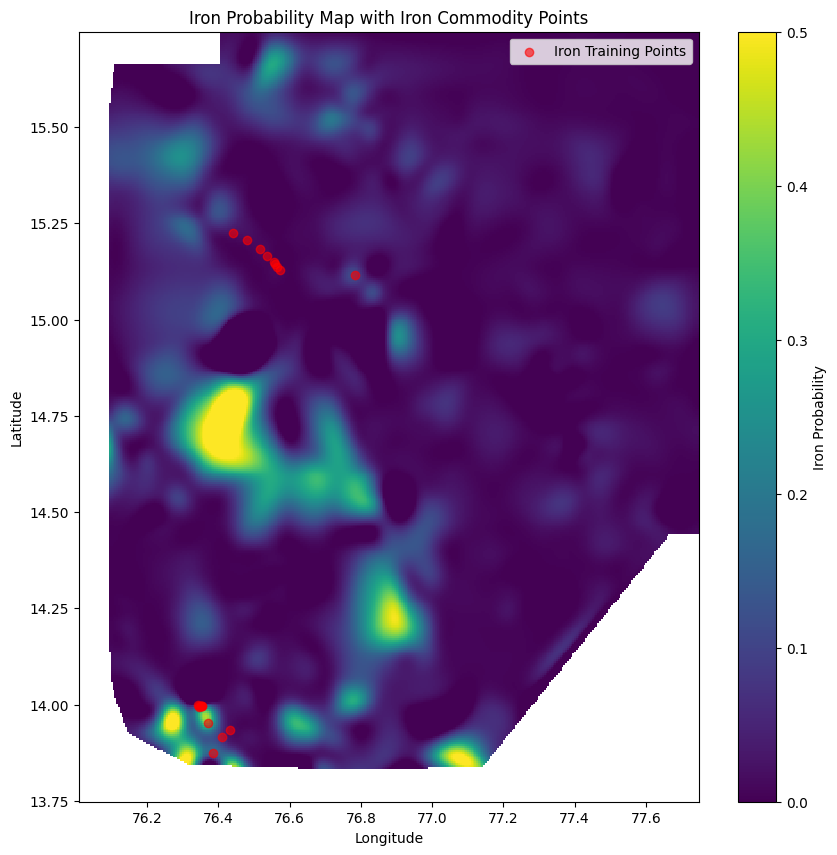

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.ndimage import gaussian_filter

# Step 1: Load the commodity training gold points data
training_data_path = '/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/Commodity_Training_Points.xlsx'  # Update with your file path
training_data = pd.read_excel(training_data_path)

# Filter out the GOLD points from the training data
gold_points = training_data[training_data['Commodity'] == 'IRON']

# Step 2: Load the gold probability data (prediction data)
gold_predictions_path = '/content/drive/MyDrive/HACATHON-2025_GSI/data_2025_hackathon/MODELS/RESULTS/iron_predictions_excl_litho_output.xlsx'  # Update with your file path
gold_data = pd.read_excel(gold_predictions_path)

# Extract X, Y, and prob_gold from the dataset
x = gold_data['X']
y = gold_data['Y']
prob_gold = gold_data['prob_iron']

# Step 3: Create grid coordinates for the gridded map
grid_resolution = 0.005  # Define grid resolution (adjust as necessary)
min_x, min_y = x.min(), y.min()
max_x, max_y = x.max(), y.max()

# Create meshgrid for the region
grid_x, grid_y = np.meshgrid(np.arange(min_x, max_x, grid_resolution), np.arange(min_y, max_y, grid_resolution))

# Step 4: Interpolate the data to fit the grid
grid_prob_gold = griddata((x, y), prob_gold, (grid_x, grid_y), method='cubic')

# Step 5: Apply Gaussian smoothing to the grid data for a smoother map
smoothed_grid_prob_gold = gaussian_filter(grid_prob_gold, sigma=4)

# Step 6: Plot the smoothed gridded gold probability map
fig, ax = plt.subplots(figsize=(10, 10))
c = ax.pcolormesh(grid_x, grid_y, smoothed_grid_prob_gold, shading='auto', cmap='viridis', vmin=0, vmax=0.5)
fig.colorbar(c, ax=ax, label="Iron Probability")

# Step 7: Overlay the GOLD training points on top of the probability map
ax.scatter(gold_points['X'], gold_points['Y'], c='red', marker='o', label='Iron Training Points', alpha=0.6)

# Add title and labels
ax.set_title('Iron Probability Map with Iron Commodity Points')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.legend()
plt.show()

##3.4 DIAMOND MODEL

### ANN without Lithology, Ba